# W207 Final Project Anup Jha and Anish Phillip

## Members
* Anup Jha
* Anish Phillip  

## Project Title 

Facial Key Point Detection

## Description

* The objective of this project is to identify the location of facial keypoints on the images of face  
* There are 15 keypoints on the face such as :
- left_eye_center
- right_eye_cente
- left_eye_inner_corner
- left_eye_outer_corner
- right_eye_inner_corner
- right_eye_outer_corner
- left_eyebrow_inner_end
- left_eyebrow_outer_end_
- right_eyebrow_inner_end
- right_eyebrow_outer_end
- nose_tip
- mouth_left_corner
- mouth_right_corne
- mouth_center_top_lip
- mouth_center_bottom_lip
* Each of the feature has X and Y co-ordinates 
* The image itself is 96 X 96 grayscale image 
 
## Features Available 
* The value of 9216 pixels of the image are available for each training example 
* The values of pixels vary from 0 to 255 

## Feature Engineering 
We intend to do the following feature engineering to make the predictions accurate
 * For Random forest and SVM regression we will include gaussian blurring 
 * Normalization of the pixel values to be scaled between 0 and 1 
 * Since we plan to use the neural nets for the predictions we don't focus much on feature engineering for neural nets but we will have dropouts of the neurons

## Expected Outcome
  * We plan to create a model which can predict the location of the key features in terms of pixel position 
  * The model will be fed a gray scale image of face of size 96X96 

## Algorithms    
  *  We plan to use :  
  - Random Forest regression
  - SVM regression
  - Fully connected neural network 
  - Convolutional neural network 

## Baseline 
 * For Baseline performance we will take the mean value of each keypoint as prediction and check the RMSE
    
## Data Set 
  * For the training set we have 7049 example rows but only 2140 examples have all the facial key points 
  * We will split the training set into training set and validation set
  * We have test set set with 1783 images of 96X96 pixel images for which we need to submit our predictions for the competition
  * The training set has 7049 X 31 shape
  * The last column has space separated values of pixels
    
## Hyper Paramaters 
  * For Random forest we will tune the number of estimators,max depth
  * For SVM regressor we will tune the regularization penalty 
  * For the neural nets we will tune the number of neurons in each layer 
  
## Dimension reduction 
 * For Random Forest and SVM regression we will consider PCA dimension reduction 

## Loss Function 
 * We would be using the RMSE error as output is a location of the keypoint and RMSE would be appropriate as it will give distance of the error   
 
## Data Augmentation
  
  * Since the training set would be low in number we would also flip the images to get more training data
 
 


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import math
from IPython.display import display, HTML
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import time
from sklearn.multioutput import MultiOutputRegressor
import skimage
from skimage.filters import gaussian
import cv2


In [2]:
data_images = pd.read_csv("./facial_keypoint_detection_project_data/training.csv")
test_data_images = pd.read_csv("./facial_keypoint_detection_project_data/test.csv")

# Data Exploration

In [3]:
data_images.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


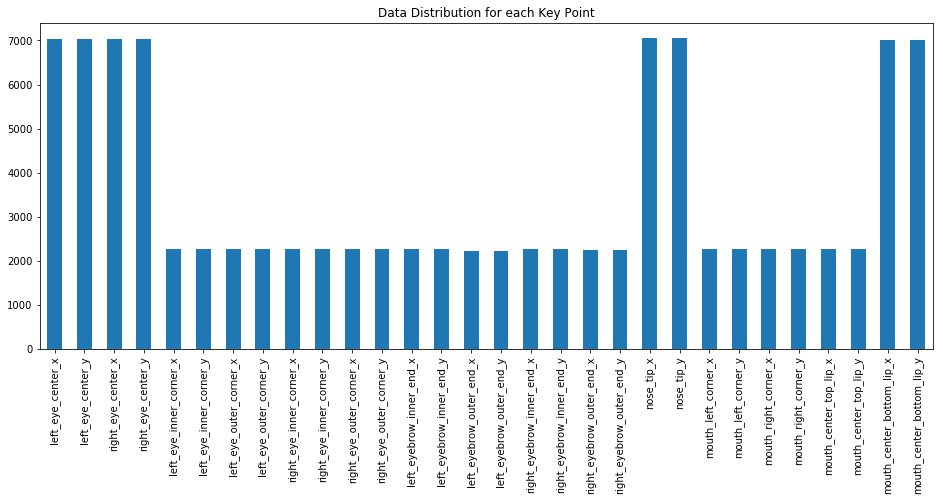

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [4]:
# We see that there are 30 columns for 15 locations ( X and Y ) 
# while last column contains pixel values for 96X96 image 
# let us see plot the counts
fig = plt.figure(figsize=(16,6))
data_images.describe().loc['count'].plot.bar()
plt.title("Data Distribution for each Key Point")
plt.show()
data_images.count()

In [5]:
data_images = data_images.dropna()
NPImage = data_images['Image'].apply(lambda pv: np.fromstring(pv,sep=' '))
X_raw = np.vstack(NPImage.values)
Y_raw = data_images[data_images.columns[:-1]].values

## Plot some images with key points

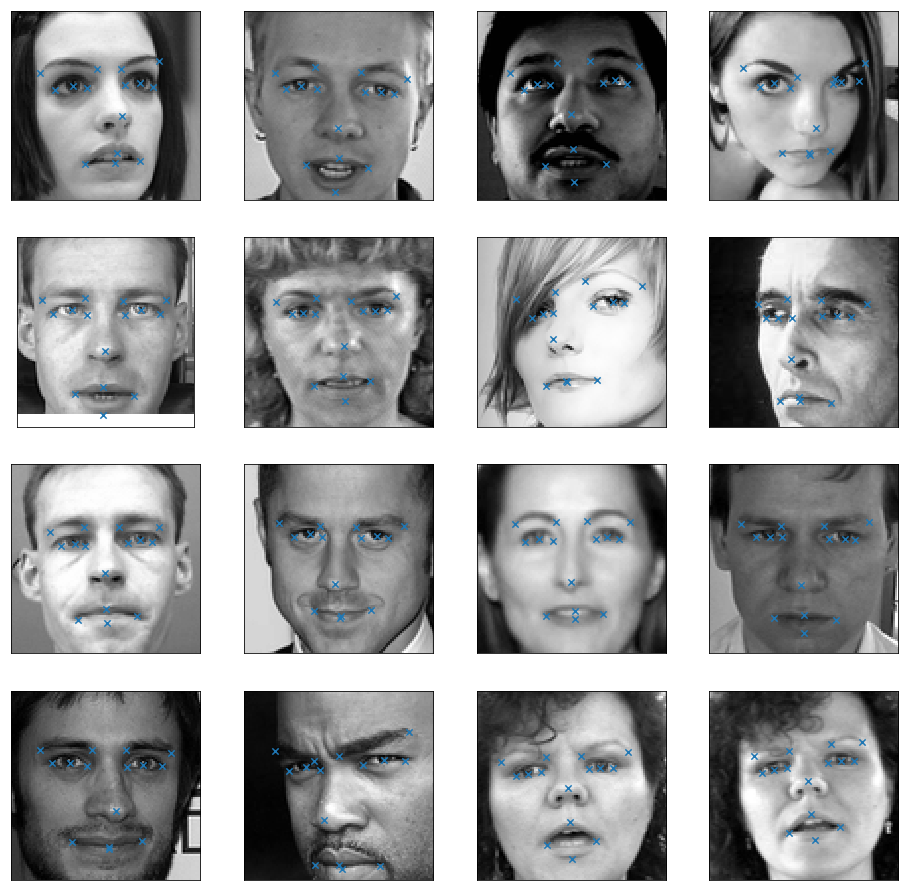

In [6]:
np.random.seed(0)
#Let us plot some training images and its key facial data points to look at the problem in hand
def plot_image(x,y,plot_axis):
    image = x.reshape(96,96)
    plot_axis.imshow(image,cmap='gray')
    plot_axis.scatter(y[0::2], y[1::2], marker='x', s=40)
fig = plt.figure(figsize=(16, 16))
random_index = np.random.randint(0,X_raw.shape[0],16)
for i,v in enumerate(random_index):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_image(X_raw[v],Y_raw[v],ax)
plt.show()  

We see from the images above that there are some images where the eyebrows are not fully visibe due to hair still the location is marked . These kind of samples would make learning even harder!

## Data Augmentation
  
We plan to augment the data by mirror imaging the data . Let us First check an example to see how would it look


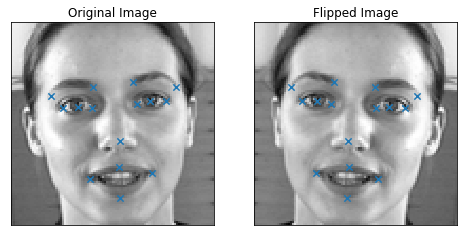

In [7]:
# We have seen from the data that there are 2140 examples. 
# So we want to augment data to have more training samples
# oneway to do that is to flip the images to make mirror images
# let us do that and plot one of the image in its real form and one in flipped form 
p=20
selected_image_X = X_raw[p]
selected_image_Y = Y_raw[p]
# to flip the image we first copy and then flip each row
selected_image_X_flip = X_raw[p].copy().reshape(96,96)
selected_image_X_flip = selected_image_X_flip[:,::-1,...]
selected_image_X_flip = selected_image_X_flip.ravel()
# We only need to flip the x axis of the keypoints
selected_image_Y_flip = selected_image_Y.copy()
selected_image_Y_flip[0:30:2] = 95 - selected_image_Y_flip[0:30:2]
#Also flip the left to right
flip_index_pairs = [(0,2),(1,3),(4,8),(5,9),(6,10),(7,11),(12,16),(13,17),(14,18),(15,19),(22,24),(23,25)]
for flipi in flip_index_pairs:
    temp = selected_image_Y_flip[flipi[0]]
    selected_image_Y_flip[flipi[0]] = selected_image_Y_flip[flipi[1]]
    selected_image_Y_flip[flipi[1]] = temp
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plot_image(selected_image_X,selected_image_Y,ax)
ax.set_title("Original Image")
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plot_image(selected_image_X_flip,selected_image_Y_flip,ax)
ax.set_title("Flipped Image")
plt.show()  

## Data Set creation for training and Dev

In [2]:
# we see that only about 2140 rows have all 30 output columns with values
# we will drop the rows which have null values 
# We see that the training file image column has pixel value as space separated values 
# we will convert that into np array
# We also scale the image pixel values between 0 and 1 by dividing each by 255
# We also scale the location of each feature between -1 and 1 
# We also add the flipped images data 
# We create a function which returns the shuffled value for X and Y 
np.random.seed(0)
def getData():
    data_images = pd.read_csv("./facial_keypoint_detection_project_data/training.csv")
    data_images = data_images.dropna()
    data_images['Image'] = data_images['Image'].apply(lambda pv: np.fromstring(pv,sep=' '))    
    X_original = np.vstack(data_images['Image'].values)
    Y_original = data_images[data_images.columns[:-1]].values
    X_flip = X_original.copy()
    Y_flip = Y_original.copy()
    for n,data in enumerate(X_flip):
        X_flip_temp = X_flip[n].reshape(96,96)
        X_flip_temp = X_flip_temp[:,::-1,...]
        X_flip[n]   = X_flip_temp.ravel()
    
    Y_flip[:,0:30:2] = 95 - Y_flip[:,0:30:2]
    #print(Y_original[40])
    #print(Y_flip[40])
    flip_index_pairs = [(0,2),(1,3),(4,8),(5,9),(6,10),(7,11),(12,16),(13,17),(14,18),(15,19),(22,24),(23,25)]
    for flipi in flip_index_pairs:
        temp = Y_flip[:,flipi[0]].copy()
        Y_flip[:,flipi[0]] = Y_flip[:,flipi[1]]
        Y_flip[:,flipi[1]] = temp

   
    #print(Y_flip[40])
    #fig = plt.figure(figsize=(8, 4))
    #ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
    #plot_image(X_original[40],Y_original[40],ax)
    #ax.set_title("Original Image")
    #ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
    #plot_image(X_flip[40],Y_flip[40],ax)
    #ax.set_title("Flipped Image")

    # normalize the data between 0 and 1
    X = np.vstack((X_original,X_flip))/255
    # normalize Y value between -1 and 1
    Y = (np.vstack((Y_original,Y_flip)) - 48)/48
    shuffle = np.random.permutation(np.arange(X.shape[0]))
    X, Y = X[shuffle], Y[shuffle]
    return X,Y

X,Y = getData()
X_train = X[:math.ceil(X.shape[0]*.8)]
Y_train = Y[:math.ceil(Y.shape[0]*.8)]
X_dev   = X[math.ceil(X.shape[0]*.8):]
Y_dev   = Y[math.ceil(Y.shape[0]*.8):]
print("Train Data Shape : ", X_train.shape)
print("Train Y Shape : ",Y_train.shape)
print("Dev Data Shape : ", X_dev.shape)
print("Dev Y Shape :", Y_dev.shape) 

Train Data Shape :  (3424, 9216)
Train Y Shape :  (3424, 30)
Dev Data Shape :  (856, 9216)
Dev Y Shape : (856, 30)


## Baseline
Now let us create base line. In the baseline we are going to take average of the co-ordinates as predicted value and caluclate the RMSE for dev set using the average as prediction

In [4]:
#Create utility function which caluculates the RMSE for whole set ,each example,each feature
def compute_rmse(Y_true,Y_pred):
    RMSE = np.sqrt(np.sum(np.square(Y_pred-Y_true))/(Y_true.shape[0]*15))
    RMSE_unscaled = 48*RMSE
    RMSE_eachexample = np.sqrt(np.sum(np.square(Y_pred-Y_true),axis=1)/15)
    RMSE_eachexample_unscaled = 48*RMSE_eachexample
    RMSE_each_feature = np.sqrt(np.sum(np.square(Y_pred[:,0:30:2]-Y_true[:,0:30:2])\
                                                 +np.square(Y_pred[:,1:30:2]-Y_true[:,1:30:2])\
                                                 ,axis=0)\
                                        /Y_true.shape[0])
    RMSE_each_feature_unscaled = 48*RMSE_each_feature
    return RMSE,RMSE_unscaled,RMSE_eachexample,RMSE_eachexample_unscaled,RMSE_each_feature,RMSE_each_feature_unscaled

Base Line RMSE = 0.093240 
We have normalized the predicted value between -1,1 so original baseline RMSE is 48 X RMSE = 4.475508
Base Line RMSE for each Feature:


,Baseline RMSE
left_eye_center,3.051300
right_eye_center,3.136273
left_eye_inner_corner,2.702646
left_eye_outer_corner,3.806337
right_eye_inner_corner,2.862443
right_eye_outer_corner,3.841355
left_eyebrow_inner_end,3.873038
left_eyebrow_outer_end,4.882846
right_eyebrow_inner_end,4.043334
right_eyebrow_outer_end,5.115585


16 Images with highest RMSE:


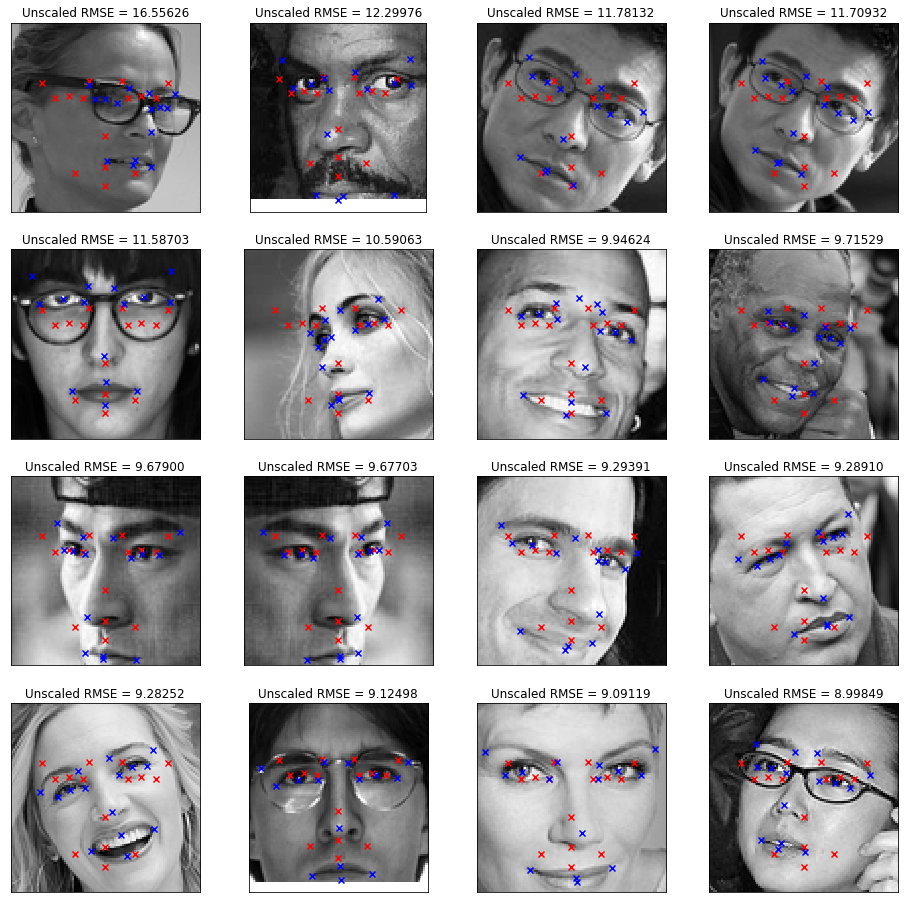

In [5]:
Y_baseLine_predictions = np.mean(Y_train,axis=0).reshape(1,30)

base_line_RMSE,base_line_RMSE_unscaled,base_line_RMSE_eachexample,base_line_RMSE_eachexample_unscaled,\
base_line_RMSE_each_feature,base_line_RMSE_each_feature_unscaled = compute_rmse(Y_dev,Y_baseLine_predictions)

print("Base Line RMSE = %.6f "%(base_line_RMSE))

print("We have normalized the predicted value between -1,1 so original baseline RMSE is 48 X RMSE = %.6f"\
      %(base_line_RMSE_unscaled))
#base_line_RMSE_eachexample = np.sqrt(np.sum(np.square(Y_baseLine_predictions-Y_dev),axis=1)/15)
#base_line_RMSE_eachexample_unscaled = 48*base_line_RMSE_eachexample
#base_line_RMSE_each_feature = np.sqrt(np.sum(np.square(Y_baseLine_predictions[:,0:30:2]-Y_dev[:,0:30:2])\
#                                             +np.square(Y_baseLine_predictions[:,1:30:2]-Y_dev[:,1:30:2])\
#                                             ,axis=0)\
#                                            /Y_dev.shape[0])
#base_line_RMSE_each_feature_unscaled = 48*base_line_RMSE_each_feature

feature_names = ['left_eye_center'           
,'right_eye_center'           
,'left_eye_inner_corner'     
,'left_eye_outer_corner'      
,'right_eye_inner_corner'     
,'right_eye_outer_corner'     
,'left_eyebrow_inner_end'     
,'left_eyebrow_outer_end'    
,'right_eyebrow_inner_end'    
,'right_eyebrow_outer_end'    
,'nose_tip'                   
,'mouth_left_corner'          
,'mouth_right_corner'         
,'mouth_center_top_lip'       
,'mouth_center_bottom_lip']    
                        

base_line_RMSE_each_feature_unscaled_df = pd.DataFrame(data=base_line_RMSE_each_feature_unscaled,
                                                       columns=['Baseline RMSE'],
                                                       index=feature_names)
print("Base Line RMSE for each Feature:")
display(base_line_RMSE_each_feature_unscaled_df)
#Let us plot 4 dev set images with most RMSE 
#print(base_line_RMSE_eachexample[np.argsort(base_line_RMSE_eachexample,axis=0)[-4:]][::-1])

#print(np.argsort(base_line_RMSE_eachexample,axis=0)[-4:][::-1])
#print(base_line_RMSE_eachexample[784])
print("16 Images with highest RMSE:")
fig = plt.figure(figsize=(16, 16))
count = 1
for i in np.argsort(base_line_RMSE_eachexample,axis=0)[-16:][::-1] :
    ax = fig.add_subplot(4, 4, count, xticks=[], yticks=[])
    ax.imshow((X_dev[i]).reshape(96,96),cmap='gray')
    ax.scatter(Y_baseLine_predictions[0,0::2]*48+48, 
               Y_baseLine_predictions[0,1::2]*48+48,marker='x',color='red')
    ax.scatter(Y_dev[i,0::2]*48+48, 
               Y_dev[i,1::2]*48+48,marker='x',color='blue')
    ax.set_title("Unscaled RMSE = %.5f"%(base_line_RMSE_eachexample_unscaled[i]))
    count +=1
plt.show()

## PCA Analysis for the features

In [11]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

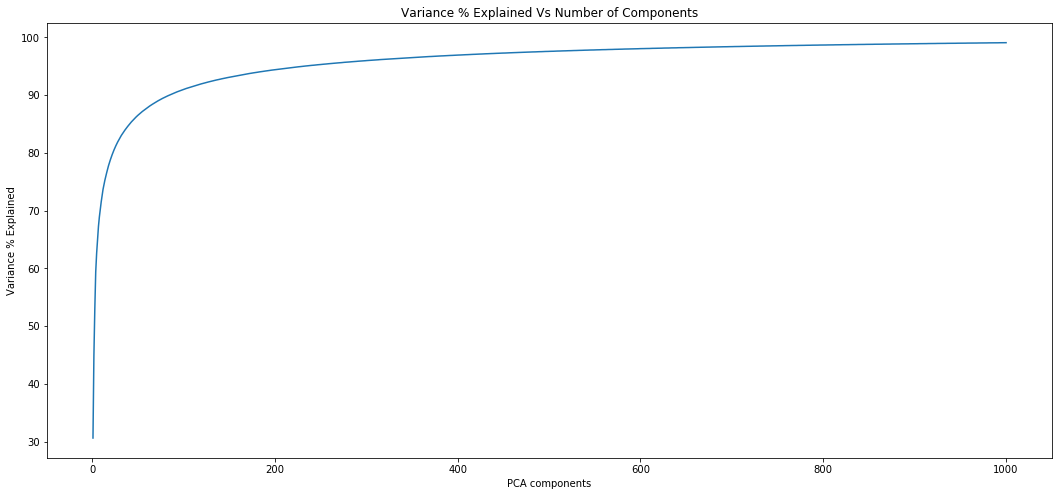

Total Variance represented by 1000 PCA components: 0.99060 


In [12]:
#Now plot the variance percentage explained by the first 1000 principal components
cum_sum = np.cumsum(pca.explained_variance_ratio_)    
#for i in range(0,100):
#    print("%% Variance explained by %d Principal Components: %.2f"%(i+1,round(cum_sum[i]*100,2)))
#Let us plot the cumulative variance % by PCA components
fig = plt.figure(figsize=(18,8))
plt.plot(range(1,1001),np.round(cum_sum[:1000,]*100,2))
plt.xlabel("PCA components")
plt.ylabel("Variance % Explained")
plt.title("Variance % Explained Vs Number of Components")
plt.show()
print("Total Variance represented by 1000 PCA components: %.5f "%(cum_sum[1000,]))

## Now Let us first try Random Forest Regressor to predict the keypoint location
- First we will do PCA to get the features which represent varaince of 99%. We see that 1000 PCA components would explain 99% of the variance
- Then we will use GridSearch to figure out the best parameters for the random forest

In [13]:
pca_1000 = PCA(n_components=1000)
pca_1000.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=1000, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
#Now let us transform training and dev set to get reduced dimension training set
X_train_PCA = pca_1000.transform(X_train)
X_dev_PCA = pca_1000.transform(X_dev)

In [35]:
#We will use GridSearchCV to get the best hyperparameters
RfGridParam = {'n_estimators': [5,10,15,30,50,100,200,400,500],'max_depth': [5,10,15,30]}
RF = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(estimator=RF,param_grid=RfGridParam,cv=3,n_jobs=4,verbose=4,scoring='neg_mean_squared_error')
# Fit the grid search to the data
startTime = time.time()
grid_search.fit(X_train_PCA,Y_train)
endTime = time.time()
print("Time taken by GridSearch = ", endTime - startTime)
print(grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 91.6min
[Parallel(n_jobs=4)]: Done 108 out of 108 | elapsed: 148.9min finished


Time taken by GridSearch =  10660.203265666962
{'max_depth': 30, 'n_estimators': 500}


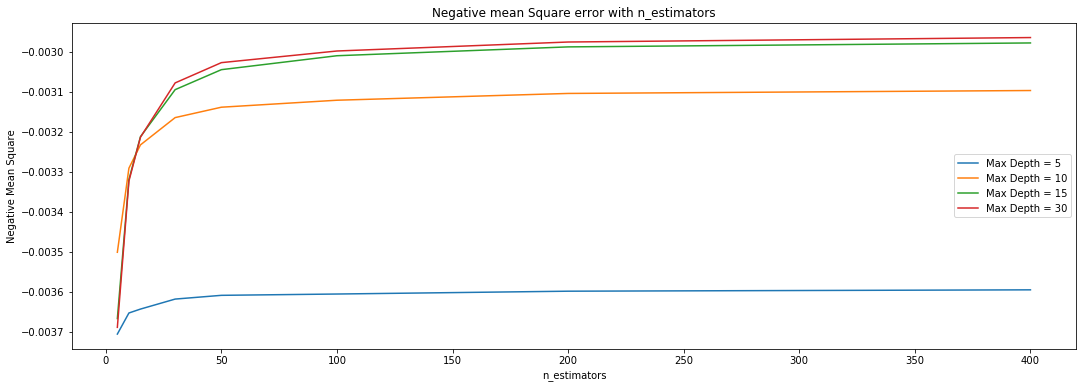

In [41]:
#Let us plot the negative mean squared error with the number of estimators and max depth
fig = plt.figure(figsize=(18,6))
plt.plot([d['n_estimators'] for d in grid_search.cv_results_['params'][0:9:]],\
         grid_search.cv_results_['mean_test_score'][0:9:],label='Max Depth = 5')
plt.plot([d['n_estimators'] for d in grid_search.cv_results_['params'][9:18:]],\
         grid_search.cv_results_['mean_test_score'][9:18:],label='Max Depth = 10')
plt.plot([d['n_estimators'] for d in grid_search.cv_results_['params'][18:27:]],\
         grid_search.cv_results_['mean_test_score'][18:27:],label='Max Depth = 15')
plt.plot([d['n_estimators'] for d in grid_search.cv_results_['params'][27:36:]],\
         grid_search.cv_results_['mean_test_score'][27:36:],label='Max Depth = 30')
plt.xlabel("n_estimators")
plt.ylabel("Negative Mean Square")
plt.title("Negative mean Square error with n_estimators")
plt.legend()
plt.show()

We see from the above graph that the mean square error does keep decreasing with increasing depth and number of estimators the gain plateaus and is neglible after depth 15 and n_estimators 200. So we can take the best parameters as suggested by the Grid Search eventhough we have not found absolute best parameters. 

In [42]:
#Create Random forest with the best parameters chosen above and then fit
rf = RandomForestRegressor(n_estimators=500,random_state=0,max_depth=30)
rf.fit(X_train_PCA,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Random Forest RMSE = 0.073336 
We have normalized the predicted value between -1,1 so original Random Forest RMSE is 48 X RMSE = 3.520137


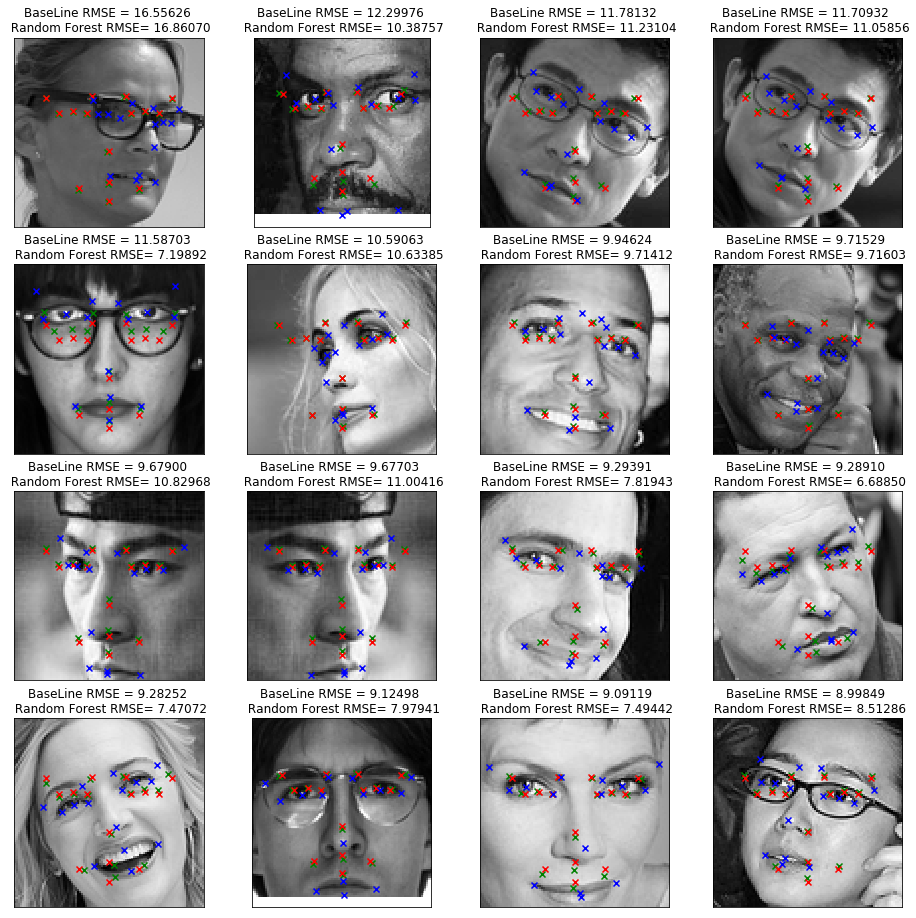

In [45]:
#predict the key feature locations
y_pred_rf = rf.predict(X_dev_PCA)
rf_RMSE,rf_RMSE_unscaled,rf_RMSE_eachexample,rf_RMSE_eachexample_unscaled,\
rf_RMSE_each_feature,rf_RMSE_each_feature_unscaled = compute_rmse(Y_dev,y_pred_rf)

print("Random Forest RMSE = %.6f "%(rf_RMSE))

print("We have normalized the predicted value between -1,1 so original Random Forest RMSE is 48 X RMSE = %.6f"\
      %(rf_RMSE_unscaled))
fig = plt.figure(figsize=(16, 16))
count = 1
for i in np.argsort(base_line_RMSE_eachexample,axis=0)[-16:][::-1] :
    
    ax = fig.add_subplot(4, 4, count, xticks=[], yticks=[])
    ax.imshow((X_dev[i]).reshape(96,96),cmap='gray')
    ax.scatter(y_pred_rf[i,0::2]*48+48, 
               y_pred_rf[i,1::2]*48+48,marker='x',color='green')
    ax.scatter(Y_baseLine_predictions[0,0::2]*48+48, 
               Y_baseLine_predictions[0,1::2]*48+48,marker='x',color='red')
    ax.scatter(Y_dev[i,0::2]*48+48, 
               Y_dev[i,1::2]*48+48,marker='x',color='blue')
    ax.set_title("BaseLine RMSE = %.5f \n Random Forest RMSE= %.5f"\
                 %(base_line_RMSE_eachexample_unscaled[i],rf_RMSE_eachexample_unscaled[i]))
    count +=1
plt.show()

## Now we will try the SVM regression
- We will use multioutput regressor with SVR 
- We will use GridSearchCV to tune the hyperparameters

In [15]:
#We will use GridSearchCV to get the best hyperparameters
Svr = SVR(gamma='scale')
Mor = MultiOutputRegressor(estimator=Svr)
SVRGridParam = {'estimator__C': [1,10,15,30,50,100,200,400,500],'estimator__epsilon': [.1,.15,.2,.25,.3,.5]}

grid_search_svr = GridSearchCV(estimator=Mor,param_grid=SVRGridParam,cv=3,n_jobs=4,verbose=4,scoring='neg_mean_squared_error')
# Fit the grid search to the data
startTime = time.time()
grid_search_svr.fit(X_train_PCA,Y_train)
endTime = time.time()
print("Time taken by GridSearch = ", endTime - startTime)
print(grid_search_svr.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   47.5s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 162 out of 162 | elapsed:  7.3min finished


Time taken by GridSearch =  458.0402593612671
{'estimator__C': 1, 'estimator__epsilon': 0.1}


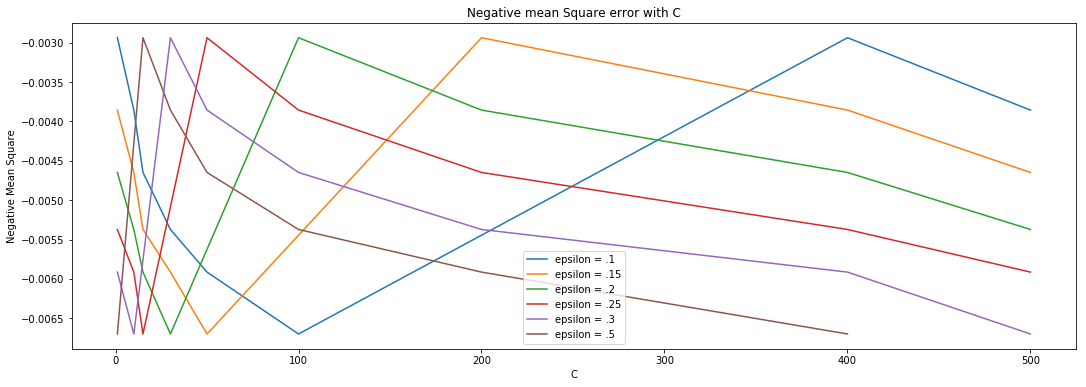

In [19]:
#print(grid_search_svr.cv_results_)
#print([d['estimator__C'] for d in grid_search_svr.cv_results_['params'][0::7]])
#Let us plot the negative mean squared error with C and epsilon
fig = plt.figure(figsize=(18,6))
plt.plot([d['estimator__C'] for d in grid_search_svr.cv_results_['params'][0::7]],\
         grid_search_svr.cv_results_['mean_test_score'][0::7],label='epsilon = .1')
plt.plot([d['estimator__C'] for d in grid_search_svr.cv_results_['params'][1::7]],\
         grid_search_svr.cv_results_['mean_test_score'][1::7],label='epsilon = .15')
plt.plot([d['estimator__C'] for d in grid_search_svr.cv_results_['params'][2::7]],\
         grid_search_svr.cv_results_['mean_test_score'][2::7],label='epsilon = .2')
plt.plot([d['estimator__C'] for d in grid_search_svr.cv_results_['params'][3::7]],\
         grid_search_svr.cv_results_['mean_test_score'][3::7],label='epsilon = .25')
plt.plot([d['estimator__C'] for d in grid_search_svr.cv_results_['params'][4::7]],\
         grid_search_svr.cv_results_['mean_test_score'][4::7],label='epsilon = .3')
plt.plot([d['estimator__C'] for d in grid_search_svr.cv_results_['params'][5::7]],\
         grid_search_svr.cv_results_['mean_test_score'][5::7],label='epsilon = .5')

plt.xlabel("C")
plt.ylabel("Negative Mean Square")
plt.title("Negative mean Square error with C")
plt.legend()
plt.show()

We see that the best parameter is with C=1 and epsilon = 0.1

 Support Vector RMSE = 0.073166 
We have normalized the predicted value between -1,1 so original Support Vector RMSE is 48 X RMSE = 3.511949


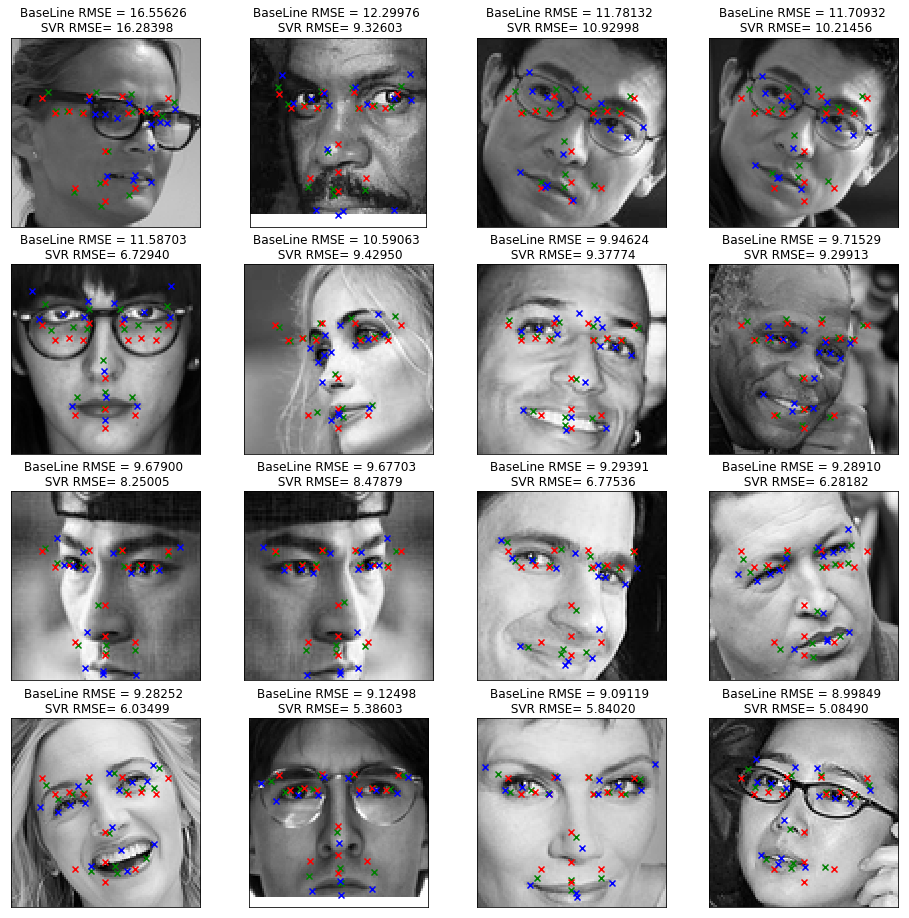

In [20]:
#Create a multioutput regressor with best parameters
svr = SVR(gamma='scale',C=1,epsilon=.1)
mor = MultiOutputRegressor(estimator=svr)
mor.fit(X_train_PCA,Y_train)
#predict the key feature locations
y_pred_svr = mor.predict(X_dev_PCA)
svr_RMSE,svr_RMSE_unscaled,svr_RMSE_eachexample,svr_RMSE_eachexample_unscaled,\
svr_RMSE_each_feature,svr_RMSE_each_feature_unscaled = compute_rmse(Y_dev,y_pred_svr)

print(" Support Vector RMSE = %.6f "%(svr_RMSE))

print("We have normalized the predicted value between -1,1 so original Support Vector RMSE is 48 X RMSE = %.6f"\
      %(svr_RMSE_unscaled))
fig = plt.figure(figsize=(16, 16))
count = 1
for i in np.argsort(base_line_RMSE_eachexample,axis=0)[-16:][::-1] :
    
    ax = fig.add_subplot(4, 4, count, xticks=[], yticks=[])
    ax.imshow((X_dev[i]).reshape(96,96),cmap='gray')
    ax.scatter(y_pred_svr[i,0::2]*48+48, 
               y_pred_svr[i,1::2]*48+48,marker='x',color='green')
    ax.scatter(Y_baseLine_predictions[0,0::2]*48+48, 
               Y_baseLine_predictions[0,1::2]*48+48,marker='x',color='red')
    ax.scatter(Y_dev[i,0::2]*48+48, 
               Y_dev[i,1::2]*48+48,marker='x',color='blue')
    ax.set_title("BaseLine RMSE = %.5f \n SVR RMSE= %.5f"\
                 %(base_line_RMSE_eachexample_unscaled[i],svr_RMSE_eachexample_unscaled[i]))
    count +=1
plt.show()


We see that with random forest and SVM regressor we get the best RMSE around 3.5 .
Now we will try Neural Nets

## Neural Nets
### Convultional Neural Net
As a first step we will create the CNN with the following architecture:  

**Model1 :**

Input  
CNN1 -- 32 maps kernel size 3X3 activation relu  
Maxpool1 -- 2X2 stride 2    
CNN2 -- 64 maps kernel size kernel size 3X3 activation relu 
Maxpool2 -- 2X2 stride 2  
CNN3 -- 128 Maps Kernel size 2X2 activation relu  
Maxpool3 -- 2X2 stride 2  
Dense Layer 1  500 neurons activation relu  
Dense Layer 2  500 neurons activation relu  
Output layer 30 neurons  -- No activation as we have regression problem  


In [6]:
# First create the X_train_NN and X_dev_NN so that it is 96X96
X_train_NN = X_train.reshape(-1,96,96,1).copy()
X_dev_NN = X_dev.reshape(-1,96,96,1).copy()
#fig = plt.figure(figsize=(4, 4))
#ax = fig.add_subplot(1, 1,1, xticks=[], yticks=[])
#ax.imshow((X_train_NN[20,:,:,0]),cmap='gray')
#plt.show()


In [61]:
# Create model1 
model1 = keras.Sequential()
model1.add(layers.Conv2D(32, kernel_size=(3, 3),data_format='channels_last',
                 activation='relu',
                 input_shape=(96,96,1)))
model1.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model1.add(layers.Conv2D(128, (2, 2), activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(500, activation='relu'))
model1.add(layers.Dense(500,activation='relu'))
model1.add(layers.Dense(30))
optimizer = tf.keras.optimizers.Adam()
model1.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])


In [62]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 21, 21, 128)       32896     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12800)             0         
__________

In [63]:
# Now let us train the model
EPOCHS =300
history = model1.fit(
  X_train_NN, Y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=2 )

Train on 2739 samples, validate on 685 samples
Epoch 1/300
 - 60s - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 2/300
 - 46s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 3/300
 - 43s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 4/300
 - 41s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 5/300
 - 41s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 6/300
 - 42s - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 7/300
 - 40s - loss: 8.8611e-04 - mean_squared_error: 8.8611e-04 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 8/300
 - 42s - loss: 7.7271e-04 - mean_squared_error: 7.7271e-04 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 9/300
 - 40

Epoch 68/300
 - 38s - loss: 5.3726e-05 - mean_squared_error: 5.3726e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 69/300
 - 38s - loss: 5.7294e-05 - mean_squared_error: 5.7294e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 70/300
 - 37s - loss: 5.1855e-05 - mean_squared_error: 5.1855e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 71/300
 - 38s - loss: 5.4137e-05 - mean_squared_error: 5.4137e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 72/300
 - 38s - loss: 7.0837e-05 - mean_squared_error: 7.0837e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 73/300
 - 37s - loss: 6.0856e-05 - mean_squared_error: 6.0856e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 74/300
 - 38s - loss: 5.6760e-05 - mean_squared_error: 5.6760e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 75/300
 - 39s - loss: 5.5890e-05 - mean_squared_error: 5.5890e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 76

Epoch 134/300
 - 38s - loss: 5.1127e-05 - mean_squared_error: 5.1127e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 135/300
 - 38s - loss: 5.1989e-05 - mean_squared_error: 5.1989e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 136/300
 - 37s - loss: 4.7520e-05 - mean_squared_error: 4.7520e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 137/300
 - 37s - loss: 4.5089e-05 - mean_squared_error: 4.5089e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 138/300
 - 38s - loss: 4.5242e-05 - mean_squared_error: 4.5242e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 139/300
 - 37s - loss: 3.6627e-05 - mean_squared_error: 3.6627e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 140/300
 - 37s - loss: 3.4289e-05 - mean_squared_error: 3.4289e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 141/300
 - 38s - loss: 3.0708e-05 - mean_squared_error: 3.0708e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010


Epoch 200/300
 - 37s - loss: 2.5130e-05 - mean_squared_error: 2.5130e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 201/300
 - 37s - loss: 2.5747e-05 - mean_squared_error: 2.5747e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 202/300
 - 38s - loss: 2.7214e-05 - mean_squared_error: 2.7214e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 203/300
 - 37s - loss: 2.5807e-05 - mean_squared_error: 2.5807e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 204/300
 - 37s - loss: 2.5845e-05 - mean_squared_error: 2.5845e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 205/300
 - 38s - loss: 2.3069e-05 - mean_squared_error: 2.3069e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 206/300
 - 37s - loss: 2.1216e-05 - mean_squared_error: 2.1216e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 207/300
 - 37s - loss: 1.9195e-05 - mean_squared_error: 1.9195e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010


Epoch 266/300
 - 37s - loss: 2.1400e-05 - mean_squared_error: 2.1400e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 267/300
 - 36s - loss: 2.1948e-05 - mean_squared_error: 2.1948e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 268/300
 - 36s - loss: 1.9778e-05 - mean_squared_error: 1.9778e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 269/300
 - 38s - loss: 1.7713e-05 - mean_squared_error: 1.7713e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 270/300
 - 37s - loss: 1.4202e-05 - mean_squared_error: 1.4202e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 271/300
 - 43s - loss: 1.3759e-05 - mean_squared_error: 1.3759e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 272/300
 - 38s - loss: 1.5275e-05 - mean_squared_error: 1.5275e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 273/300
 - 38s - loss: 1.5503e-05 - mean_squared_error: 1.5503e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010


In [64]:
hist1 = pd.DataFrame(history.history)
hist1['epoch'] = history.epoch
hist1.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
295,0.000022,0.000022,0.001035,0.001035,295
296,0.000024,0.000024,0.001008,0.001008,296
297,0.000025,0.000025,0.001022,0.001022,297
298,0.000026,0.000026,0.001014,0.001014,298
299,0.000030,0.000030,0.001016,0.001016,299


In [7]:
def plot_history(history,plot_title=None,ylimit=0.01):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure(figsize=(10,8))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
             label = 'Val Error')
    plt.ylim([0,ylimit])
    plt.title(plot_title)
    plt.legend()
    plt.show()



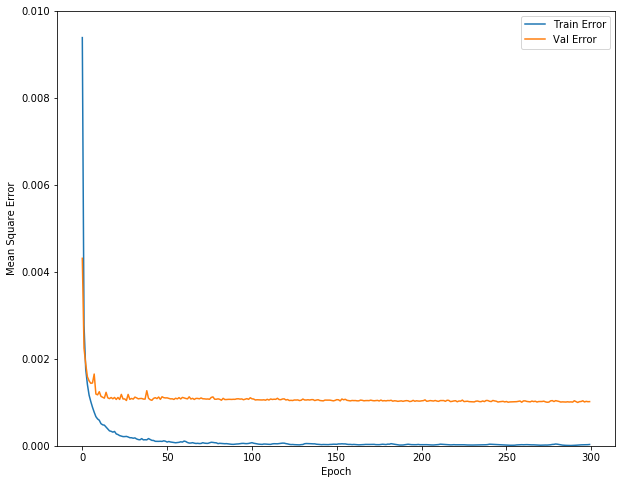

In [127]:
plot_history(history)
#Save the model
model1.save('model1.hd5')

We see that after aound epoch 100 there is not much gain in the validation loss. So we should consider stopping at that epoch  
  
Now we will try another model with activation function as leaky Relu . We are trying this as Relu has a problem which makes many neurons dead.   

##  Model2 with Leaky ReLU as activation function

**Model2 :**

Input  
CNN1 -- 32 maps kernel size 3X3 activation leaky-relu  
Maxpool1 -- 2X2 stride 2    
CNN2 -- 64 maps kernel size kernel size 3X3 activation leaky-relu 
Maxpool2 -- 2X2 stride 2  
CNN3 -- 128 Maps Kernel size 2X2 activation leaky-relu  
Maxpool3 -- 2X2 stride 2  
Dense Layer 1  500 neurons activation leaky-relu  
Dense Layer 2  500 neurons activation leaky-relu  
Output layer 30 neurons  -- No activation as we have regression problem

In [81]:
# Create model2
model2 = keras.Sequential()
model2.add(layers.Conv2D(32, kernel_size=(3, 3),data_format='channels_last',
                 activation='linear',
                 input_shape=(96,96,1)))
model2.add(LeakyReLU(alpha=0.1))
model2.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='linear'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model2.add(layers.Conv2D(128, (2, 2), activation='linear'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(500, activation='linear'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(layers.Dense(500,activation='linear'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(layers.Dense(30))
optimizer = tf.keras.optimizers.Adam()
model2.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 45, 45, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 21, 21, 128)       32896     
__________

In [82]:
# Now let us train the model this time with epochs as 100
EPOCHS =100
history2 = model2.fit(
  X_train_NN, Y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=2 )

Train on 2739 samples, validate on 685 samples
Epoch 1/100
 - 37s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 2/100
 - 42s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 3/100
 - 42s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 4/100
 - 41s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 5/100
 - 40s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 6/100
 - 40s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 7/100
 - 39s - loss: 8.4781e-04 - mean_squared_error: 8.4781e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 8/100
 - 40s - loss: 7.5174e-04 - mean_squared_error: 7.5174e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 9/100
 - 40

Epoch 67/100
 - 40s - loss: 4.8925e-05 - mean_squared_error: 4.8925e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 68/100
 - 40s - loss: 6.0980e-05 - mean_squared_error: 6.0980e-05 - val_loss: 9.7626e-04 - val_mean_squared_error: 9.7626e-04
Epoch 69/100
 - 40s - loss: 4.9027e-05 - mean_squared_error: 4.9027e-05 - val_loss: 9.9620e-04 - val_mean_squared_error: 9.9620e-04
Epoch 70/100
 - 40s - loss: 4.5953e-05 - mean_squared_error: 4.5953e-05 - val_loss: 9.8129e-04 - val_mean_squared_error: 9.8129e-04
Epoch 71/100
 - 40s - loss: 4.1259e-05 - mean_squared_error: 4.1259e-05 - val_loss: 9.9013e-04 - val_mean_squared_error: 9.9013e-04
Epoch 72/100
 - 40s - loss: 4.1421e-05 - mean_squared_error: 4.1421e-05 - val_loss: 9.8352e-04 - val_mean_squared_error: 9.8352e-04
Epoch 73/100
 - 42s - loss: 3.6827e-05 - mean_squared_error: 3.6827e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 74/100
 - 40s - loss: 4.1074e-05 - mean_squared_error: 4.1074e-05 - val_loss: 9.8688e-

In [83]:
hist2 = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch
hist2.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
95,0.000043,0.000043,0.000987,0.000987,95
96,0.000045,0.000045,0.000981,0.000981,96
97,0.000045,0.000045,0.000973,0.000973,97
98,0.000044,0.000044,0.000971,0.000971,98
99,0.000043,0.000043,0.000984,0.000984,99


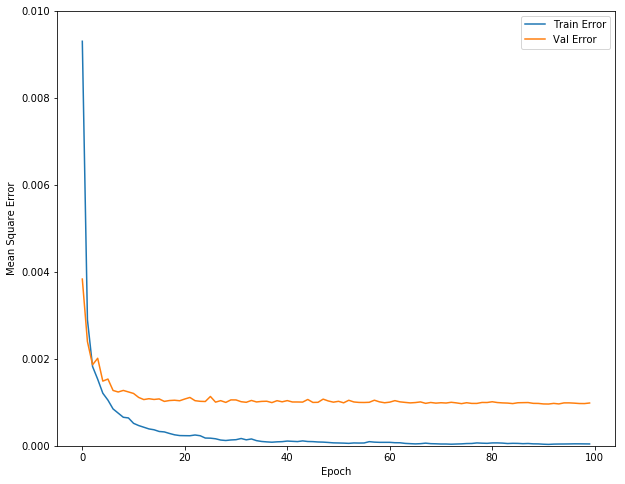

In [91]:
plot_history(history2)
#save the model
model2.save('model2.hd5')

What we see from above that the difference between Validation and train error is decreased. Also the validation error is lower than model1 .So model2 has lesser overfit and better fit to the data.  

## Model3, with dropouts

**Model3 :**  

Input  
CNN1 -- 32 maps kernel size 3X3 activation leaky-relu  
Droput -- rate 0.1   
Maxpool1 -- 2X2 stride 2  
CNN2 -- 64 maps kernel size kernel size 3X3 activation leaky-relu Maxpool2 -- 2X2 stride 2  
Dropout -- rate 0.15  
Maxpool2 -- 2X2 stride 2  
CNN3 -- 128 Maps Kernel size 2X2 activation leaky-relu  
Dropout -- rate 0.20  
Maxpool3 -- 2X2 stride 2  
Dense Layer 1 500 neurons activation leaky-relu  
Dropout rate 0.25  
Dense Layer 2 500 neurons activation leaky-relu  
Output layer 30 neurons -- No activation as we have regression problem  


In [86]:
# Create model3
model3 = keras.Sequential()
model3.add(layers.Conv2D(32, kernel_size=(3, 3),data_format='channels_last',
                 activation='linear',
                 input_shape=(96,96,1)))
model3.add(LeakyReLU(alpha=0.1))
model3.add(layers.Dropout(rate=0.1))
model3.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='linear'))
model3.add(LeakyReLU(alpha=0.1))
model3.add(layers.Dropout(rate=0.15))
model3.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model3.add(layers.Conv2D(128, (2, 2), activation='linear'))
model3.add(LeakyReLU(alpha=0.1))
model3.add(layers.Dropout(rate=0.20))
model3.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(500, activation='linear'))
model3.add(LeakyReLU(alpha=0.1))
model3.add(layers.Dropout(rate=0.25))
model3.add(layers.Dense(500,activation='linear'))
model3.add(LeakyReLU(alpha=0.1))
model3.add(layers.Dense(30))
optimizer = tf.keras.optimizers.Adam()
model3.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])
model3.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 94, 94, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 45, 45, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 45, 45, 64)        0         
__________

In [87]:
# Now let us train the model this time with epochs as 100
EPOCHS =100
history3 = model3.fit(
  X_train_NN, Y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=2 )

Train on 2739 samples, validate on 685 samples
Epoch 1/100
 - 52s - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 2/100
 - 53s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 3/100
 - 53s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 4/100
 - 54s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 5/100
 - 59s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 6/100
 - 54s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 7/100
 - 53s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 8/100
 - 62s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 9/100
 - 54s - loss: 0.0011

Epoch 66/100
 - 54s - loss: 2.6943e-04 - mean_squared_error: 2.6943e-04 - val_loss: 9.2840e-04 - val_mean_squared_error: 9.2840e-04
Epoch 67/100
 - 54s - loss: 2.6938e-04 - mean_squared_error: 2.6938e-04 - val_loss: 9.0856e-04 - val_mean_squared_error: 9.0855e-04
Epoch 68/100
 - 54s - loss: 2.7139e-04 - mean_squared_error: 2.7139e-04 - val_loss: 9.7227e-04 - val_mean_squared_error: 9.7227e-04
Epoch 69/100
 - 54s - loss: 2.7361e-04 - mean_squared_error: 2.7361e-04 - val_loss: 9.2437e-04 - val_mean_squared_error: 9.2437e-04
Epoch 70/100
 - 54s - loss: 2.7286e-04 - mean_squared_error: 2.7286e-04 - val_loss: 9.0265e-04 - val_mean_squared_error: 9.0265e-04
Epoch 71/100
 - 54s - loss: 2.7205e-04 - mean_squared_error: 2.7205e-04 - val_loss: 9.9320e-04 - val_mean_squared_error: 9.9320e-04
Epoch 72/100
 - 54s - loss: 2.7623e-04 - mean_squared_error: 2.7623e-04 - val_loss: 9.3257e-04 - val_mean_squared_error: 9.3257e-04
Epoch 73/100
 - 54s - loss: 2.6612e-04 - mean_squared_error: 2.6612e-04 - va

In [88]:
hist3 = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch
hist3.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
95,0.000231,0.000231,0.000884,0.000884,95
96,0.000241,0.000241,0.000948,0.000948,96
97,0.000244,0.000244,0.000908,0.000908,97
98,0.000242,0.000242,0.000888,0.000888,98
99,0.000230,0.000230,0.000960,0.000960,99


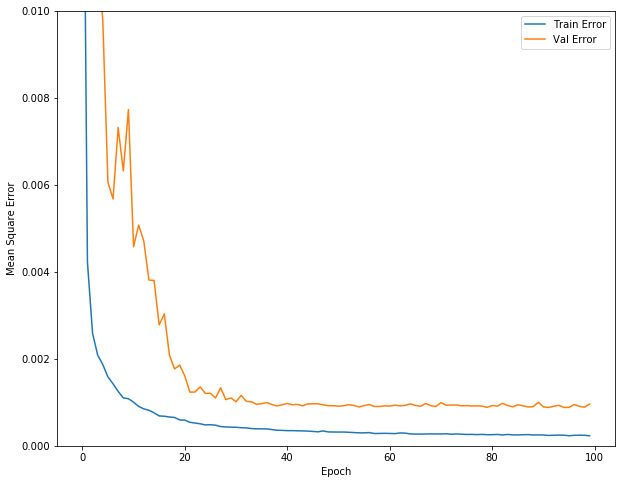

In [92]:
plot_history(history3)
#save the model 
model3.save('model3.hd5')

What we see here is that the validation loss and training loss are lot similar showing that the drop outs are making sure that we are not overfitting.  

## Model4 with Mini batch normalization without Dropouts
Now , we will tray moni batch normalization without droputs and check its performance    
**Model4 :**  

Input  
CNN1 -- 32 maps kernel size 3X3  
MiniBatch Normalization Layer  
activation leaky-relu  
Maxpool1 -- 2X2 stride 2  
CNN2 -- 64 maps kernel size kernel size 3X3    
MiniBatch Normalization Layer  
activation leaky-relu   
Maxpool2 -- 2X2 stride 2    
CNN3 -- 128 Maps Kernel size 2X2  
MiniBatch Normalization Layer  
activation leaky-relu    
Maxpool3 -- 2X2 stride 2    
Dense Layer 1 500 neurons  
MiniBatch Normalization Layer  
activation leaky-relu    
Dense Layer 2 500 neurons   
MiniBatch Normalization Layer  
activation leaky-relu  
Output layer 30 neurons -- No activation as we have regression problem    


In [7]:
# Create model4
model4 = keras.Sequential()
model4.add(layers.Conv2D(32, kernel_size=(3, 3),data_format='channels_last',
                 activation='linear',
                 input_shape=(96,96,1)))
model4.add(layers.BatchNormalization())
model4.add(LeakyReLU(alpha=0.1))
model4.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='linear'))
model4.add(layers.BatchNormalization())
model4.add(LeakyReLU(alpha=0.1))
model4.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model4.add(layers.Conv2D(128, (2, 2), activation='linear'))
model4.add(layers.BatchNormalization())
model4.add(LeakyReLU(alpha=0.1))
model4.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(500, activation='linear'))
model4.add(layers.BatchNormalization())
model4.add(LeakyReLU(alpha=0.1))
model4.add(layers.Dense(500,activation='linear'))
model4.add(layers.BatchNormalization())
model4.add(LeakyReLU(alpha=0.1))
model4.add(layers.Dense(30))
optimizer = tf.keras.optimizers.Adam()
model4.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])
model4.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
batch_normalization_v1_10 (B (None, 94, 94, 32)        128       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
batch_normalization_v1_11 (B (None, 45, 45, 64)        256       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 45, 45, 64)        0         
__________

In [8]:
# Now let us train the model this time with epochs as 100
EPOCHS =100
history4 = model4.fit(
  X_train_NN, Y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=2 )

Train on 2739 samples, validate on 685 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 139s - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 2/100
 - 159s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 3/100
 - 160s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 4/100
 - 149s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 5/100
 - 127s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 6/100
 - 140s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 7/100
 - 146s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 8/100
 - 157s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0035 - val_mean

Epoch 69/100
 - 156s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 70/100
 - 156s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 71/100
 - 141s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 72/100
 - 158s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 73/100
 - 157s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 74/100
 - 158s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 75/100
 - 157s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 76/100
 - 158s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 77/100
 - 158s - loss: 0.0011 - mean_squared_error: 0.0011

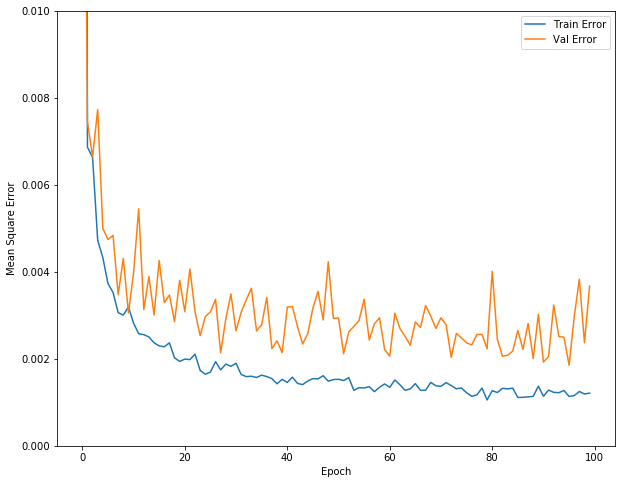

In [11]:
hist4 = pd.DataFrame(history4.history)
hist4['epoch'] = history4.epoch
hist4.tail()
plot_history(history4)
#save the model 
model4.save('model4.hd5')

What we see from the above plot that the validation error and train error are quite similar wheich means that its not overfitting. But the overall mean squared error is bigger than model3. Also around epoch 60 we get enough stability in the errors. One thing we can try is increasing the number of neurons and add batch normalization and droputs both. 

## Model5 Batch normalization with droputs and more number of neurons
**Model5 :**  

Input  
CNN1 -- 96 maps kernel size 3X3  
MiniBatch Normalization Layer  
activation leaky-relu  
Droput -- rate 0.1  
Maxpool1 -- 2X2 stride 2  
CNN2 -- 128 maps kernel size kernel size 3X3    
MiniBatch Normalization Layer  
activation leaky-relu
Droput -- rate 0.15  
Maxpool2 -- 2X2 stride 2    
CNN3 -- 128 Maps Kernel size 2X2  
MiniBatch Normalization Layer  
activation leaky-relu
Droput -- rate 0.2  
Maxpool3 -- 2X2 stride 2    
Dense Layer 1 1000 neurons  
MiniBatch Normalization Layer  
activation leaky-relu
Droput -- rate 0.25  
Dense Layer 2 1000 neurons   
MiniBatch Normalization Layer  
activation leaky-relu
Droput -- rate 0.30  
Output layer 30 neurons -- No activation as we have regression problem  

In [13]:
# Create model5
model5 = keras.Sequential()
model5.add(layers.Conv2D(96, kernel_size=(3, 3),data_format='channels_last',
                 activation='linear',
                 input_shape=(96,96,1)))
model5.add(layers.BatchNormalization())
model5.add(LeakyReLU(alpha=0.1))
model5.add(layers.Dropout(rate=0.1))
model5.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='linear'))
model5.add(layers.BatchNormalization())
model5.add(LeakyReLU(alpha=0.1))
model5.add(layers.Dropout(rate=0.15))
model5.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model5.add(layers.Conv2D(128, (2, 2), activation='linear'))
model5.add(layers.BatchNormalization())
model5.add(LeakyReLU(alpha=0.1))
model5.add(layers.Dropout(rate=0.2))
model5.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model5.add(layers.Flatten())
model5.add(layers.Dense(1000, activation='linear'))
model5.add(layers.BatchNormalization())
model5.add(LeakyReLU(alpha=0.1))
model5.add(layers.Dropout(rate=0.25))
model5.add(layers.Dense(1000,activation='linear'))
model5.add(layers.BatchNormalization())
model5.add(LeakyReLU(alpha=0.1))
model5.add(layers.Dropout(rate=0.3))
model5.add(layers.Dense(30))
optimizer = tf.keras.optimizers.Adam()
model5.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])
model5.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 94, 94, 96)        960       
_________________________________________________________________
batch_normalization_v1_20 (B (None, 94, 94, 96)        384       
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 94, 94, 96)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 94, 94, 96)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 47, 47, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 45, 45, 128)       110720    
_________________________________________________________________
batch_normalization_v1_21 (B (None, 45, 45, 128)       512       
__________

In [14]:
# Now let us train the model this time with epochs as 10 to just see the perf as number of parameters
# is very large
EPOCHS =10
history5 = model5.fit(
  X_train_NN, Y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=2 )

Train on 2739 samples, validate on 685 samples
Epoch 1/10
 - 431s - loss: 0.4905 - mean_squared_error: 0.4905 - val_loss: 0.0640 - val_mean_squared_error: 0.0640
Epoch 2/10
 - 443s - loss: 0.1961 - mean_squared_error: 0.1961 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 3/10
 - 445s - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 4/10
 - 474s - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 5/10
 - 478s - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 6/10
 - 483s - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 7/10
 - 486s - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8/10
 - 475s - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 9/10
 - 485s - loss: 0.0220

What we see is that the above CNN is too slow to train . We might not be able to scale this .

## Model6, with dropouts but pooling and drop outs in later layers 

**Model6 :**  

Input  
CNN1 -- 32 maps kernel size 3X3 activation leaky-relu 
CNN2 -- 64 maps kernel size 3X3 activation leaky-relu 
Dropout -- rate 0.15  
Maxpool2 -- 2X2 stride 2
CNN3 -- 64 maps kernel size kernel size 3X3 activation leaky-relu   
Dropout -- rate 0.15  
Maxpool2 -- 2X2 stride 2  
CNN4 -- 128 Maps Kernel size 2X2 activation leaky-relu  
Dropout -- rate 0.20  
Maxpool3 -- 2X2 stride 2  
Dense Layer 1 500 neurons activation leaky-relu  
Dropout rate 0.25  
Dense Layer 2 500 neurons activation leaky-relu  
Output layer 30 neurons -- No activation as we have regression problem  


In [21]:
# Create model6
model6 = keras.Sequential()
model6.add(layers.Conv2D(32, kernel_size=(3, 3),data_format='channels_last',
                 activation='linear',
                 input_shape=(96,96,1)))
model6.add(LeakyReLU(alpha=0.1))
model6.add(layers.Conv2D(64, (3, 3), activation='linear'))
model6.add(LeakyReLU(alpha=0.1))
model6.add(layers.Dropout(rate=0.1))
model6.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model6.add(layers.Conv2D(64, (3, 3), activation='linear'))
model6.add(LeakyReLU(alpha=0.1))
model6.add(layers.Dropout(rate=0.15))
model6.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model6.add(layers.Conv2D(128, (2, 2), activation='linear'))
model6.add(LeakyReLU(alpha=0.1))
model6.add(layers.Dropout(rate=0.20))
model6.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model6.add(layers.Flatten())
model6.add(layers.Dense(500, activation='linear'))
model6.add(LeakyReLU(alpha=0.1))
model6.add(layers.Dropout(rate=0.25))
model6.add(layers.Dense(500,activation='linear'))
model6.add(LeakyReLU(alpha=0.1))
model6.add(layers.Dense(30))
optimizer = tf.keras.optimizers.Adam()
model6.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
leaky_re_lu_52 (LeakyReLU)   (None, 94, 94, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 92, 92, 64)        18496     
_________________________________________________________________
leaky_re_lu_53 (LeakyReLU)   (None, 92, 92, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 92, 92, 64)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 44, 44, 64)        36928     
__________

In [22]:
# Now let us train the model this time with epochs as 50
EPOCHS =50
history6 = model6.fit(
  X_train_NN, Y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=2 )

Train on 2739 samples, validate on 685 samples
Epoch 1/50
 - 139s - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 2/50
 - 158s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 3/50
 - 158s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 4/50
 - 158s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 5/50
 - 157s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 6/50
 - 158s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 7/50
 - 158s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 8/50
 - 158s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 9/50
 - 157s - loss: 0.0012

In [23]:
hist6 = pd.DataFrame(history6.history)
hist6['epoch'] = history6.epoch
hist6.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
45,0.000323,0.000323,0.000895,0.000895,45
46,0.000335,0.000335,0.000900,0.000900,46
47,0.000325,0.000325,0.000886,0.000886,47
48,0.000317,0.000317,0.000893,0.000893,48
49,0.000305,0.000305,0.000904,0.000904,49


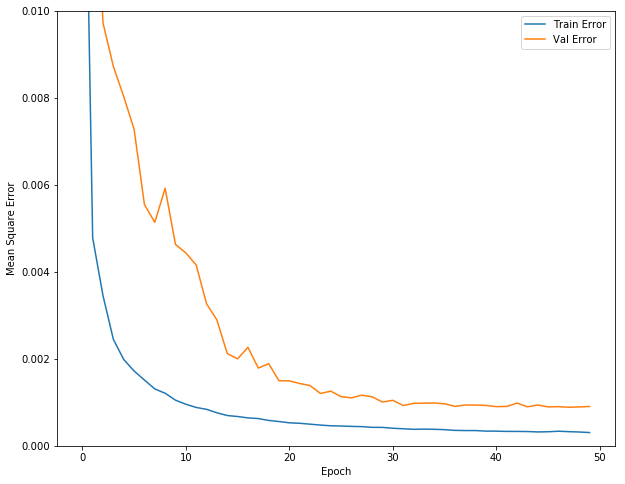

In [24]:
plot_history(history6)
#save the model 
model6.save('model6.hd5')

We see that this model has better  accuracy and also has train and Validation loss very close so not much overfitting  

## Model7, with dropouts but pooling and drop outs in later layers ,First layer bigger Kernel 

In the Model 6 we had first two CNN layers with same kernel size without pooling in between .   
This time we will increase the kernel size for the first layer to 5X5 instead of 3 X 3  

**Model7 :**  

Input  
CNN1 -- 32 maps kernel size 5X5 activation leaky-relu 
CNN2 -- 64 maps kernel size 3X3 activation leaky-relu 
Dropout -- rate 0.15  
Maxpool2 -- 2X2 stride 2
CNN3 -- 64 maps kernel size kernel size 3X3 activation leaky-relu   
Dropout -- rate 0.15  
Maxpool2 -- 2X2 stride 2  
CNN4 -- 128 Maps Kernel size 2X2 activation leaky-relu  
Dropout -- rate 0.20  
Maxpool3 -- 2X2 stride 2  
Dense Layer 1 500 neurons activation leaky-relu  
Dropout rate 0.25  
Dense Layer 2 500 neurons activation leaky-relu  
Output layer 30 neurons -- No activation as we have regression problem  



In [25]:
# Create model7
model7 = keras.Sequential()
model7.add(layers.Conv2D(32, kernel_size=(5, 5),data_format='channels_last',
                 activation='linear',
                 input_shape=(96,96,1)))
model7.add(LeakyReLU(alpha=0.1))
model7.add(layers.Conv2D(64, (3, 3), activation='linear'))
model7.add(LeakyReLU(alpha=0.1))
model7.add(layers.Dropout(rate=0.1))
model7.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model7.add(layers.Conv2D(64, (3, 3), activation='linear'))
model7.add(LeakyReLU(alpha=0.1))
model7.add(layers.Dropout(rate=0.15))
model7.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model7.add(layers.Conv2D(128, (2, 2), activation='linear'))
model7.add(LeakyReLU(alpha=0.1))
model7.add(layers.Dropout(rate=0.20))
model7.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model7.add(layers.Flatten())
model7.add(layers.Dense(500, activation='linear'))
model7.add(LeakyReLU(alpha=0.1))
model7.add(layers.Dropout(rate=0.25))
model7.add(layers.Dense(500,activation='linear'))
model7.add(LeakyReLU(alpha=0.1))
model7.add(layers.Dense(30))
optimizer = tf.keras.optimizers.Adam()
model7.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])
model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 92, 92, 32)        832       
_________________________________________________________________
leaky_re_lu_58 (LeakyReLU)   (None, 92, 92, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 90, 90, 64)        18496     
_________________________________________________________________
leaky_re_lu_59 (LeakyReLU)   (None, 90, 90, 64)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 90, 90, 64)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 43, 43, 64)        36928     
__________

In [26]:
# Now let us train the model this time with epochs as 50
EPOCHS =50
history7 = model7.fit(
  X_train_NN, Y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=2 )

Train on 2739 samples, validate on 685 samples
Epoch 1/50
 - 123s - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 2/50
 - 133s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 3/50
 - 142s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 4/50
 - 147s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 5/50
 - 146s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 6/50
 - 147s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 7/50
 - 146s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 8/50
 - 147s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 9/50
 - 147s - loss: 0.0011

In [27]:
hist7 = pd.DataFrame(history7.history)
hist7['epoch'] = history7.epoch
hist7.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
45,0.000313,0.000313,0.000909,0.000909,45
46,0.000305,0.000305,0.000948,0.000948,46
47,0.000305,0.000305,0.000894,0.000894,47
48,0.000309,0.000309,0.000923,0.000923,48
49,0.000304,0.000304,0.000914,0.000914,49


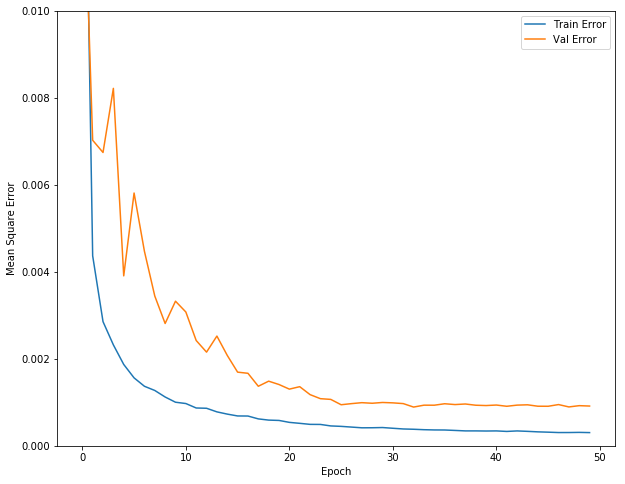

In [28]:
plot_history(history7)
#save the model 
model7.save('model7.hd5')

We see that model7 gives better performance and the train and validation error are quite similar so not much overfitting. 

## Model8, with no dropouts in Convolutional layers and using average pooling instead of max pool

**Model8 :**  

Input  
CNN1 -- 32 maps kernel size 5X5 activation leaky-relu  
CNN2 -- 64 maps kernel size 3X3 activation leaky-relu  
AvgPool -- 2X2 stride 2  
CNN3 -- 64 maps kernel size kernel size 3X3 activation leaky-relu   
AvgPool -- 2X2 stride 2   
CNN4 -- 128 Maps Kernel size 2X2 activation leaky-relu  
AvgPool -- 2X2 stride 2   
Dense Layer 1 500 neurons activation leaky-relu   
Dropout rate 0.25  
Dense Layer 2 500 neurons activation leaky-relu  
Dropout rate 0.30  
Output layer 30 neurons -- No activation as we have regression problem  


In [8]:
# Create model8
model8 = keras.Sequential()
model8.add(layers.Conv2D(32, kernel_size=(5, 5),data_format='channels_last',
                 activation='linear',
                 input_shape=(96,96,1)))
model8.add(LeakyReLU(alpha=0.1))
model8.add(layers.Conv2D(64, (3, 3), activation='linear'))
model8.add(LeakyReLU(alpha=0.1))
model8.add(layers.AveragePooling2D(pool_size=(2, 2),strides=(2, 2)))
model8.add(layers.Conv2D(64, (3, 3), activation='linear'))
model8.add(LeakyReLU(alpha=0.1))
model8.add(layers.AveragePooling2D(pool_size=(2, 2),strides=(2, 2)))
model8.add(layers.Conv2D(128, (2, 2), activation='linear'))
model8.add(LeakyReLU(alpha=0.1))
model8.add(layers.AveragePooling2D(pool_size=(2, 2),strides=(2, 2)))
model8.add(layers.Flatten())
model8.add(layers.Dense(500, activation='linear'))
model8.add(LeakyReLU(alpha=0.1))
model8.add(layers.Dropout(rate=0.25))
model8.add(layers.Dense(500,activation='linear'))
model8.add(LeakyReLU(alpha=0.1))
model8.add(layers.Dropout(rate=0.3))
model8.add(layers.Dense(30))
optimizer = tf.keras.optimizers.Adam()
model8.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])
model8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 92, 92, 32)        832       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 92, 92, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 90, 90, 64)        0         
_________________________________________________________________
average_pooling2d_3 (Average (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 43, 43, 64)        36928     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 43, 43, 64)        0         
__________

In [10]:
# Now let us train the model this time with epochs as 50
EPOCHS =50
history8 = model8.fit(
  X_train_NN, Y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=2 )

Train on 2739 samples, validate on 685 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 87s - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 2/50
 - 88s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 3/50
 - 91s - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 4/50
 - 91s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 5/50
 - 92s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 6/50
 - 94s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 7/50
 - 117s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 8/50
 - 97s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0016 - val_mean_squared_error:

In [11]:
hist8 = pd.DataFrame(history8.history)
hist8['epoch'] = history8.epoch
hist8.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
45,0.000609,0.000609,0.000913,0.000913,45
46,0.000604,0.000604,0.000914,0.000914,46
47,0.000591,0.000591,0.000903,0.000903,47
48,0.000566,0.000566,0.000897,0.000897,48
49,0.000567,0.000567,0.000913,0.000913,49


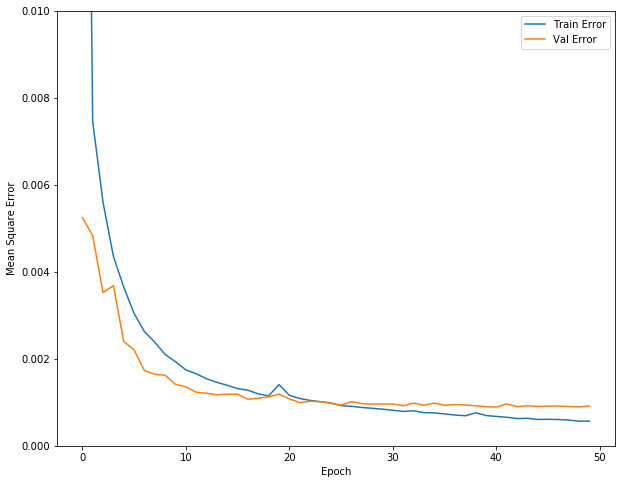

In [12]:
plot_history(history8)
#save the model 
model8.save('model8.hd5')

We see that model8 has actually validation loss less than training loss for quite some epochs.Also the validation loss is very close to training loss. This tells us that the model is not quite stable and we actually ran another test with higher number of training cases and the model diverges at certain points. We will try max pool without droputs in the convolution layers this time. 

## Model9, with no dropouts in Convolutional layers and using max pool

**Model9 :**  

Input  
CNN1 -- 32 maps kernel size 5X5 activation leaky-relu  
CNN2 -- 64 maps kernel size 3X3 activation leaky-relu  
MaxPool -- 2X2 stride 2  
CNN3 -- 64 maps kernel size kernel size 3X3 activation leaky-relu   
MaxPool -- 2X2 stride 2   
CNN4 -- 128 Maps Kernel size 2X2 activation leaky-relu  
MaxPool -- 2X2 stride 2   
Dense Layer 1 500 neurons activation leaky-relu   
Dropout rate 0.25  
Dense Layer 2 500 neurons activation leaky-relu   
Output layer 30 neurons -- No activation as we have regression problem  


In [18]:
# Create model9
model9 = keras.Sequential()
model9.add(layers.Conv2D(32, kernel_size=(5, 5),data_format='channels_last',
                 activation='linear',
                 input_shape=(96,96,1)))
model9.add(LeakyReLU(alpha=0.1))
model9.add(layers.Conv2D(64, (3, 3), activation='linear'))
model9.add(LeakyReLU(alpha=0.1))
model9.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
model9.add(layers.Conv2D(64, (3, 3), activation='linear'))
model9.add(LeakyReLU(alpha=0.1))
model9.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
model9.add(layers.Conv2D(128, (2, 2), activation='linear'))
model9.add(LeakyReLU(alpha=0.1))
model9.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
model9.add(layers.Flatten())
model9.add(layers.Dense(500, activation='linear'))
model9.add(LeakyReLU(alpha=0.1))
model9.add(layers.Dropout(rate=0.25))
model9.add(layers.Dense(500,activation='linear'))
model9.add(LeakyReLU(alpha=0.1))
model9.add(layers.Dense(30))
optimizer = tf.keras.optimizers.Adam()
model9.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])
model9.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 92, 92, 32)        832       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 92, 92, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 90, 90, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 43, 43, 64)        36928     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 43, 43, 64)        0         
__________

In [19]:
# Now let us train the model this time with epochs as 50
EPOCHS =50
history9 = model9.fit(X_train_NN, Y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=2 )

Train on 2739 samples, validate on 685 samples
Epoch 1/50
 - 88s - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 2/50
 - 93s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 3/50
 - 110s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 4/50
 - 97s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 5/50
 - 104s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 6/50
 - 107s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 7/50
 - 107s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 8/50
 - 107s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 9/50
 - 108s - loss: 0.0011 - 

In [20]:
hist9 = pd.DataFrame(history9.history)
hist9['epoch'] = history9.epoch
hist9.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
45,0.000232,0.000232,0.000912,0.000912,45
46,0.000233,0.000233,0.000915,0.000915,46
47,0.000227,0.000227,0.000940,0.000940,47
48,0.000225,0.000225,0.000947,0.000947,48
49,0.000224,0.000224,0.000926,0.000926,49


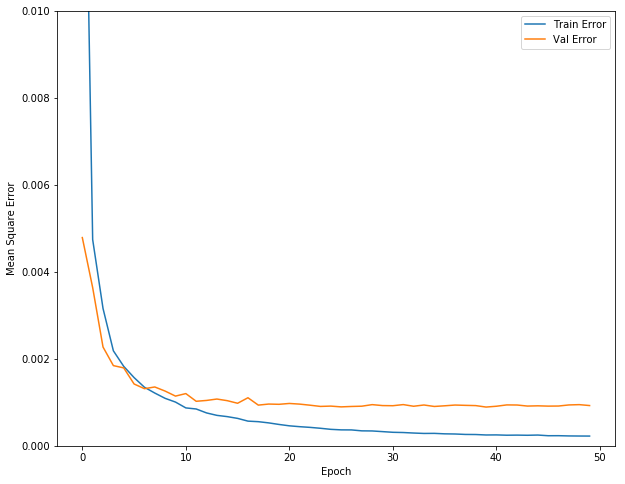

In [21]:
plot_history(history9)
#save the model 
model9.save('model9.hd5')

## Image cropping
What we have seen from the data is that mostly images are close pictures of the face. So generally eye features are on the upper half and mouth features including nose are on bottom half of the image. So we can have CNNs for eye features and mouth features and feed them with upper half and lower half images . 

In [13]:
#let us print the maximum and minimum y values for each feature 
print(np.amax(Y_train[:,1::2],axis=0))
print(np.amin(Y_train[:,1::2],axis=0))


[-0.03890789 -0.03890789 -0.01686842  0.03445469 -0.01686842  0.04171069
 -0.16055399  0.01715469 -0.16055399  0.01715469  0.5831819   0.97236744
  0.97236744  0.95659037  0.99602048]
[-0.48389434 -0.50347925 -0.45312453 -0.44746599 -0.43707463 -0.45312453
 -0.66959666 -0.72449057 -0.66959666 -0.78078491 -0.1342      0.181046
  0.181046    0.18164672  0.1923395 ]


(3424, 56, 96, 1)
(3424, 20)
(3424, 56, 96, 1)
(3424, 10)


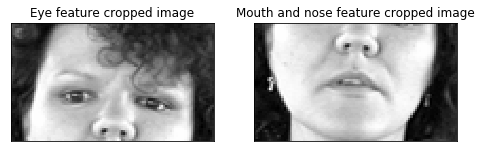

In [17]:
#From above we see that eye features are all on the top half of the images while 
#nose and mouth features are located in lower half of the images
# we can create two neural networks with cropped images
# we can have more convolutional features as we have less input size
# The eye features would use top 56 rows of the image
# The mouth features would use the lower 56 rows of the image
X_train_eye_features_NN = X_train[:,:5376].copy().reshape(-1,56,96,1)
Y_train_eye_features = Y_train[:,0:20]
X_train_mouth_features_NN = X_train[:,3840:].copy().reshape(-1,56,96,1)
Y_train_mouth_features = Y_train[:,20:]
X_dev_eye_features_NN = X_dev[:,:5376].copy().reshape(-1,56,96,1)
X_dev_mouth_features_NN = X_dev[:,3840:].copy().reshape(-1,56,96,1)

print(X_train_eye_features_NN.shape)
print(Y_train_eye_features.shape)
print(X_train_mouth_features_NN.shape)
print(Y_train_mouth_features.shape)


fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1,2,1, xticks=[], yticks=[])
ax.imshow((X_train_eye_features_NN[50,:,:,0]),cmap='gray')
ax.set_title("Eye feature cropped image")
ax = fig.add_subplot(1,2,2, xticks=[], yticks=[])
ax.imshow((X_train_mouth_features_NN[50,:,:,0]),cmap='gray')
ax.set_title("Mouth and nose feature cropped image")

plt.show()


## Eye Feature CNN and Mouth Feature CNN 

We will create two CNNS which will accept the cropped image and predict eye and mouth features. Since we are feeding the cropped image we can increase one convolution layer . 
The Model would be :

**Model :**  

Input  
CNN1 -- 32 maps kernel size 5X5 activation leaky-relu  
CNN2 -- 64 maps kernel size 3X3 activation leaky-relu  
MaxPool -- 2X2 stride 2  
CNN3 -- 64 maps kernel size kernel size 3X3 activation leaky-relu 
CNN4 -- 64 maps kernel size kernel size 3X3 activation leaky-relu
MaxPool -- 2X2 stride 2   
CNN5 -- 128 Maps Kernel size 2X2 activation leaky-relu  
MaxPool -- 2X2 stride 2   
Dense Layer 1 500 neurons activation leaky-relu   
Dropout rate 0.25  
Dense Layer 2 500 neurons activation leaky-relu   
Output layer 30 neurons -- No activation as we have regression problem  



In [11]:
#Create eye feature models 
Eye_features_model1 = keras.Sequential()
Eye_features_model1.add(layers.Conv2D(32, kernel_size=(5, 5),data_format='channels_last',
                     activation='linear',
                     input_shape=(56,96,1)))
Eye_features_model1.add(LeakyReLU(alpha=0.1))
Eye_features_model1.add(layers.Conv2D(64, (3, 3), activation='linear'))
Eye_features_model1.add(LeakyReLU(alpha=0.1))
Eye_features_model1.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Eye_features_model1.add(layers.Conv2D(64, (3, 3), activation='linear'))
Eye_features_model1.add(LeakyReLU(alpha=0.1))
Eye_features_model1.add(layers.Conv2D(64, (3, 3), activation='linear'))
Eye_features_model1.add(LeakyReLU(alpha=0.1))
Eye_features_model1.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Eye_features_model1.add(layers.Conv2D(128, (2, 2), activation='linear'))
Eye_features_model1.add(LeakyReLU(alpha=0.1))
Eye_features_model1.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Eye_features_model1.add(layers.Flatten())
Eye_features_model1.add(layers.Dense(500, activation='linear'))
Eye_features_model1.add(LeakyReLU(alpha=0.1))
Eye_features_model1.add(layers.Dropout(rate=0.25))
Eye_features_model1.add(layers.Dense(500,activation='linear'))
Eye_features_model1.add(LeakyReLU(alpha=0.1))
Eye_features_model1.add(layers.Dense(20))
optimizer = tf.keras.optimizers.Adam()
Eye_features_model1.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])
Eye_features_model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 52, 92, 32)        832       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 52, 92, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 90, 64)        18496     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 50, 90, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 45, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 23, 43, 64)        36928     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 23, 43, 64)        0         
__________

In [13]:
#train Eye feature model
# Now let us train the model this time with epochs as 50
EPOCHS =50
history_eye_features1 = Eye_features_model1.fit(X_train_eye_features_NN, Y_train_eye_features,
  epochs=EPOCHS, validation_split = 0.2, verbose=2 )

Train on 2739 samples, validate on 685 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 63s - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 2/50
 - 69s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 3/50
 - 70s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 4/50
 - 70s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 5/50
 - 69s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 6/50
 - 67s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 7/50
 - 73s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 8/50
 - 66s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0010 - val_mean_squared_error: 

In [14]:
hist_eye_features1 = pd.DataFrame(history_eye_features1.history)
hist_eye_features1['epoch'] = history_eye_features1.epoch
hist_eye_features1.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
45,0.000198,0.000198,0.000735,0.000735,45
46,0.000190,0.000190,0.000740,0.000740,46
47,0.000190,0.000190,0.000752,0.000752,47
48,0.000190,0.000190,0.000757,0.000757,48
49,0.000181,0.000181,0.000731,0.000731,49


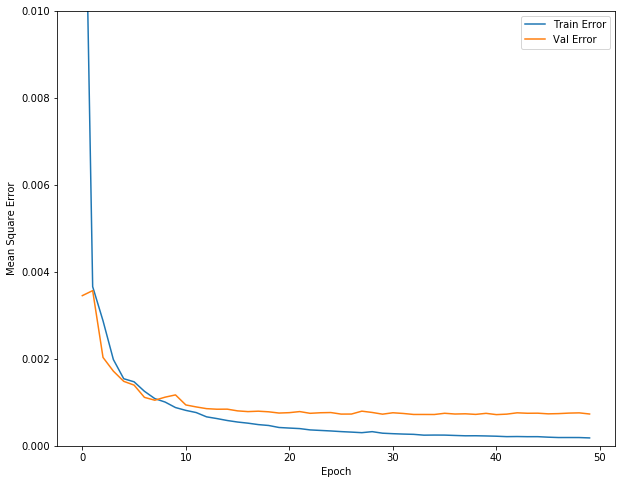

In [15]:
plot_history(history_eye_features1)
#save the model 
Eye_features_model1.save('Eye_features_model1.hd5')

In [12]:
#Create mouth feature models 
Mouth_features_model1 = keras.Sequential()
Mouth_features_model1.add(layers.Conv2D(32, kernel_size=(5, 5),data_format='channels_last',
                     activation='linear',
                     input_shape=(56,96,1)))
Mouth_features_model1.add(LeakyReLU(alpha=0.1))
Mouth_features_model1.add(layers.Conv2D(64, (3, 3), activation='linear'))
Mouth_features_model1.add(LeakyReLU(alpha=0.1))
Mouth_features_model1.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Mouth_features_model1.add(layers.Conv2D(64, (3, 3), activation='linear'))
Mouth_features_model1.add(LeakyReLU(alpha=0.1))
Mouth_features_model1.add(layers.Conv2D(64, (3, 3), activation='linear'))
Mouth_features_model1.add(LeakyReLU(alpha=0.1))
Mouth_features_model1.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Mouth_features_model1.add(layers.Conv2D(128, (2, 2), activation='linear'))
Mouth_features_model1.add(LeakyReLU(alpha=0.1))
Mouth_features_model1.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Mouth_features_model1.add(layers.Flatten())
Mouth_features_model1.add(layers.Dense(500, activation='linear'))
Mouth_features_model1.add(LeakyReLU(alpha=0.1))
Mouth_features_model1.add(layers.Dropout(rate=0.25))
Mouth_features_model1.add(layers.Dense(500,activation='linear'))
Mouth_features_model1.add(LeakyReLU(alpha=0.1))
Mouth_features_model1.add(layers.Dense(10))
optimizer = tf.keras.optimizers.Adam()
Mouth_features_model1.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])
Mouth_features_model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 52, 92, 32)        832       
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 52, 92, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 90, 64)        18496     
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 50, 90, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 45, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 23, 43, 64)        36928     
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 23, 43, 64)        0         
__________

In [36]:
#train Mouth feature model
# Now let us train the model this time with epochs as 50
EPOCHS =50
history_mouth_features1 = Mouth_features_model1.fit(X_train_mouth_features_NN, Y_train_mouth_features,
  epochs=EPOCHS, validation_split = 0.2, verbose=2 )

Train on 2739 samples, validate on 685 samples
Epoch 1/50
 - 64s - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 2/50
 - 73s - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 3/50
 - 77s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 4/50
 - 64s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 5/50
 - 61s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 6/50
 - 70s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 7/50
 - 70s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 8/50
 - 71s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 9/50
 - 70s - loss: 0.0013 - mean_s

In [37]:
hist_mouth_features1 = pd.DataFrame(history_mouth_features1.history)
hist_mouth_features1['epoch'] = history_mouth_features1.epoch
hist_mouth_features1.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
45,0.000231,0.000231,0.001203,0.001203,45
46,0.000275,0.000275,0.001247,0.001247,46
47,0.000267,0.000267,0.001320,0.001320,47
48,0.000261,0.000261,0.001195,0.001195,48
49,0.000244,0.000244,0.001191,0.001191,49


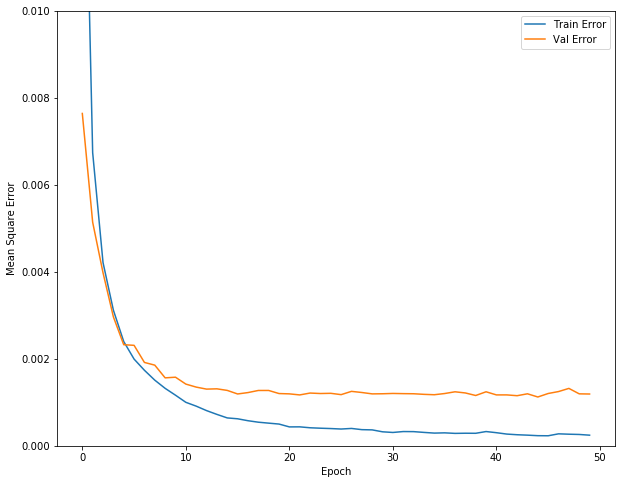

In [38]:
plot_history(history_mouth_features1)
#save the model 
Mouth_features_model1.save('Mouth_features_model1.hd5')

In [18]:
Mouth_features_model1 = keras.models.load_model('Mouth_features_model1.hd5')

 CNN RMSE = 0.038029 
We have normalized the predicted value between -1,1 so original CNN RMSE is 48 X RMSE = 1.825390
CNN RMSE for each Feature:


,CNN RMSE
left_eye_center,1.269226
right_eye_center,1.297375
left_eye_inner_corner,1.266469
left_eye_outer_corner,1.498243
right_eye_inner_corner,1.338274
right_eye_outer_corner,1.629537
left_eyebrow_inner_end,1.873932
left_eyebrow_outer_end,2.346055
right_eyebrow_inner_end,1.934533
right_eyebrow_outer_end,2.452239


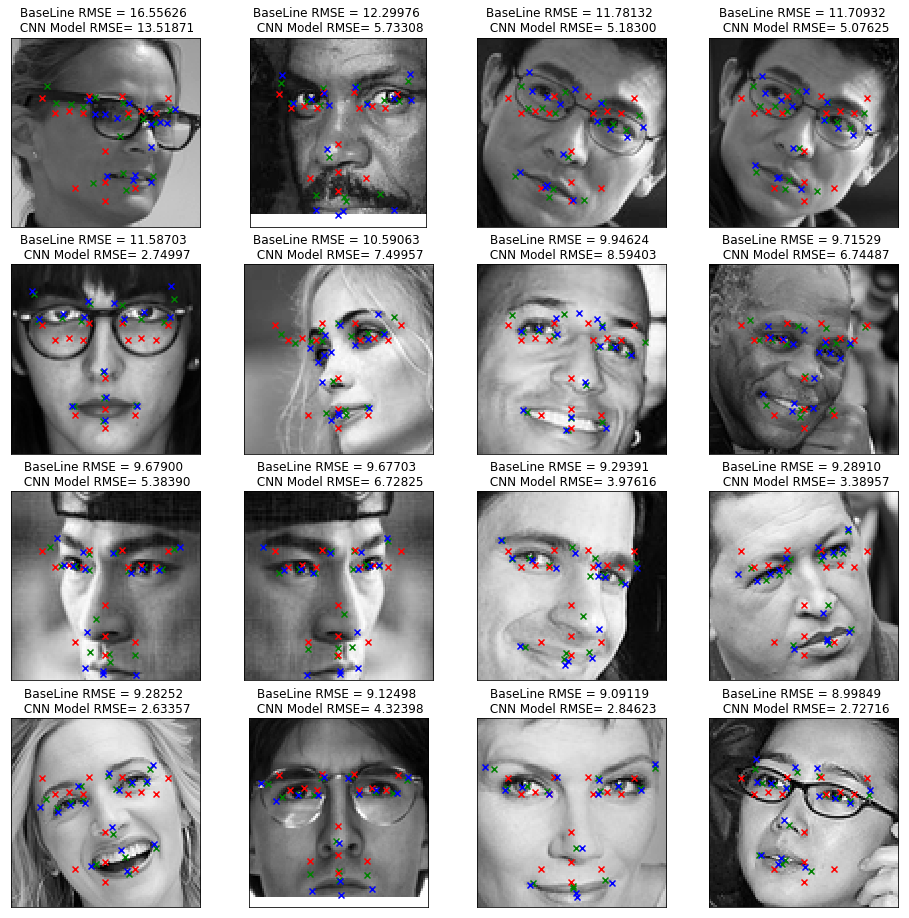

In [19]:
y_pred_eye_features = Eye_features_model1.predict(X_dev_eye_features_NN)
y_pred_mouth_features = Mouth_features_model1.predict(X_dev_mouth_features_NN)
y_pred_nn1 = np.hstack((y_pred_eye_features,y_pred_mouth_features))
#y_pred_nn1 = model9.predict(X_dev_NN)
nn1_RMSE,nn1_RMSE_unscaled,nn1_RMSE_eachexample,nn1_RMSE_eachexample_unscaled,\
nn1_RMSE_each_feature,nn1_RMSE_each_feature_unscaled = compute_rmse(Y_dev,y_pred_nn1)

print(" CNN RMSE = %.6f "%(nn1_RMSE))

print("We have normalized the predicted value between -1,1 so original CNN RMSE is 48 X RMSE = %.6f"\
      %(nn1_RMSE_unscaled))

nn1_RMSE_each_feature_unscaled_df = pd.DataFrame(data=nn1_RMSE_each_feature_unscaled,
                                                       columns=['CNN RMSE'],
                                                       index=feature_names)
print("CNN RMSE for each Feature:")
display(nn1_RMSE_each_feature_unscaled_df)
fig = plt.figure(figsize=(16, 16))
count = 1
for i in np.argsort(base_line_RMSE_eachexample,axis=0)[-16:][::-1] :
    
    ax = fig.add_subplot(4, 4, count, xticks=[], yticks=[])
    ax.imshow((X_dev[i]).reshape(96,96),cmap='gray')
    ax.scatter(y_pred_nn1[i,0::2]*48+48, 
               y_pred_nn1[i,1::2]*48+48,marker='x',color='green')
    ax.scatter(Y_baseLine_predictions[0,0::2]*48+48, 
               Y_baseLine_predictions[0,1::2]*48+48,marker='x',color='red')
    ax.scatter(Y_dev[i,0::2]*48+48, 
               Y_dev[i,1::2]*48+48,marker='x',color='blue')
    ax.set_title("BaseLine RMSE = %.5f \n CNN Model RMSE= %.5f"\
                 %(base_line_RMSE_eachexample_unscaled[i],nn1_RMSE_eachexample_unscaled[i]))
    count +=1
plt.show()


## Including dropped Images from the Training Set
During data creation we had dropped many images as those didn't have all the key points marked. One way to tackle that is to create different CNNs some features and use most of the imeages for training.    

### We will create the following new CNNs  
-  Eye Centers  : This will be fed cropped images of upper half  
-  Nose and Bottom Lip   : This will be fed cropped images of lower half  

#### Other features would be predicted using the CNN we created before

In [8]:
np.random.seed(0)
def getNaNData():
    data_images = pd.read_csv("./facial_keypoint_detection_project_data/training.csv")
    data_images = data_images[data_images.isnull().any(1)]
    data_images['Image'] = data_images['Image'].apply(lambda pv: np.fromstring(pv,sep=' '))    
    X_original = np.vstack(data_images['Image'].values)
    Y_original = data_images[data_images.columns[:-1]].values
    X_flip = X_original.copy()
    Y_flip = Y_original.copy()
    for n,data in enumerate(X_flip):
        X_flip_temp = X_flip[n].reshape(96,96)
        X_flip_temp = X_flip_temp[:,::-1,...]
        X_flip[n]   = X_flip_temp.ravel()
    
    Y_flip[:,0:30:2] = 95 - Y_flip[:,0:30:2]
    #print(Y_original[40])
    #print(Y_flip[40])
    flip_index_pairs = [(0,2),(1,3),(4,8),(5,9),(6,10),(7,11),(12,16),(13,17),(14,18),(15,19),(22,24),(23,25)]
    for flipi in flip_index_pairs:
        temp = Y_flip[:,flipi[0]].copy()
        Y_flip[:,flipi[0]] = Y_flip[:,flipi[1]]
        Y_flip[:,flipi[1]] = temp

   
    #print(Y_flip[40])
    #fig = plt.figure(figsize=(8, 4))
    #ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
    #plot_image(X_original[40],Y_original[40],ax)
    #ax.set_title("Original Image")
    #ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
    #plot_image(X_flip[40],Y_flip[40],ax)
    #ax.set_title("Flipped Image")

    # normalize the data between 0 and 1
    X = np.vstack((X_original,X_flip))/255
    # normalize Y value between -1 and 1
    Y = (np.vstack((Y_original,Y_flip)) - 48)/48
    shuffle = np.random.permutation(np.arange(X.shape[0]))
    X, Y = X[shuffle], Y[shuffle]
    return X,Y

X_Nan,Y_Nan = getNaNData()
X_train_full = np.vstack((X_train,X_Nan))
Y_train_full = np.vstack((Y_train,Y_Nan))
print("Full Train Data Shape : ", X_train_full.shape)
print("Full Train Y Shape : ",Y_train_full.shape)

Full Train Data Shape :  (13242, 9216)
Full Train Y Shape :  (13242, 30)


In [11]:
#Create eye Center models 
Eye_Center_model1 = keras.Sequential()
Eye_Center_model1.add(layers.Conv2D(32, kernel_size=(5, 5),data_format='channels_last',
                     activation='linear',
                     input_shape=(56,96,1)))
Eye_Center_model1.add(LeakyReLU(alpha=0.1))
Eye_Center_model1.add(layers.Conv2D(64, (3, 3), activation='linear'))
Eye_Center_model1.add(LeakyReLU(alpha=0.1))
Eye_Center_model1.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Eye_Center_model1.add(layers.Conv2D(64, (3, 3), activation='linear'))
Eye_Center_model1.add(LeakyReLU(alpha=0.1))
Eye_Center_model1.add(layers.Conv2D(64, (3, 3), activation='linear'))
Eye_Center_model1.add(LeakyReLU(alpha=0.1))
Eye_Center_model1.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Eye_Center_model1.add(layers.Conv2D(128, (2, 2), activation='linear'))
Eye_Center_model1.add(LeakyReLU(alpha=0.1))
Eye_Center_model1.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Eye_Center_model1.add(layers.Flatten())
Eye_Center_model1.add(layers.Dense(500, activation='linear'))
Eye_Center_model1.add(LeakyReLU(alpha=0.1))
Eye_Center_model1.add(layers.Dropout(rate=0.25))
Eye_Center_model1.add(layers.Dense(500,activation='linear'))
Eye_Center_model1.add(LeakyReLU(alpha=0.1))
Eye_Center_model1.add(layers.Dense(4))
optimizer = tf.keras.optimizers.Adam()
Eye_Center_model1.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])
print("+++++++++++++++++++EYE CENTERS MODEL +++++++++++++++++++++++++++")
Eye_Center_model1.summary()
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")

#Create Nose and bottom lip feature models 
Nose_Lip_features_model1 = keras.Sequential()
Nose_Lip_features_model1.add(layers.Conv2D(32, kernel_size=(5, 5),data_format='channels_last',
                     activation='linear',
                     input_shape=(56,96,1)))
Nose_Lip_features_model1.add(LeakyReLU(alpha=0.1))
Nose_Lip_features_model1.add(layers.Conv2D(64, (3, 3), activation='linear'))
Nose_Lip_features_model1.add(LeakyReLU(alpha=0.1))
Nose_Lip_features_model1.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Nose_Lip_features_model1.add(layers.Conv2D(64, (3, 3), activation='linear'))
Nose_Lip_features_model1.add(LeakyReLU(alpha=0.1))
Nose_Lip_features_model1.add(layers.Conv2D(64, (3, 3), activation='linear'))
Nose_Lip_features_model1.add(LeakyReLU(alpha=0.1))
Nose_Lip_features_model1.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Nose_Lip_features_model1.add(layers.Conv2D(128, (2, 2), activation='linear'))
Nose_Lip_features_model1.add(LeakyReLU(alpha=0.1))
Nose_Lip_features_model1.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Nose_Lip_features_model1.add(layers.Flatten())
Nose_Lip_features_model1.add(layers.Dense(500, activation='linear'))
Nose_Lip_features_model1.add(LeakyReLU(alpha=0.1))
Nose_Lip_features_model1.add(layers.Dropout(rate=0.25))
Nose_Lip_features_model1.add(layers.Dense(500,activation='linear'))
Nose_Lip_features_model1.add(LeakyReLU(alpha=0.1))
Nose_Lip_features_model1.add(layers.Dense(4))
optimizer = tf.keras.optimizers.Adam()
Nose_Lip_features_model1.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])
print("+++++++++++++++++++NOSE BOTTOM LIP MODEL ++++++++++++++++++++++++++++++")
Nose_Lip_features_model1.summary()
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")


+++++++++++++++++++EYE CENTERS MODEL +++++++++++++++++++++++++++
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 44, 92, 32)        832       
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 44, 92, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 42, 90, 64)        18496     
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 42, 90, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 21, 45, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 19, 43, 64)        36928     
_________________________________________________________________
leaky_re_lu

In [9]:
#Now we will create 2 different models
eye_center_y_index = [0,1,2,3]
#eye_corners_eye_brows_y_index = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
#nose_tips_y_index = [20,21]
#mouth_corner_top_lips_y_index = [22,23,24,25,26,27]
nose_tip_mouth_bottom_y_index = [20,21,28,29]
all_y_indices = [eye_center_y_index,nose_tip_mouth_bottom_y_index]
#all_models = [Eye_Center_model1,Nose_Lip_features_model1]
all_model_names = ['Eye Centers','Nose Tips and Bottom Lips']

#Crop the first half of the images for Eye centers
X_train_Eye_Center_NN = X_train_full[np.isfinite(Y_train_full[:,eye_center_y_index]).all(axis=1)]\
                        [:,:5376].copy().reshape(-1,56,96,1)
# Crop the bottom half of the images for Nose and bottom lips
X_train_Nose_tips_bottom_lips_NN = X_train_full[np.isfinite(Y_train_full[:,nose_tip_mouth_bottom_y_index]).all(axis=1)]\
                                [:,3840:].copy().reshape(-1,56,96,1)
# Y_train for Eye centers
Y_train_Eye_centers = Y_train_full[np.isfinite(Y_train_full[:,eye_center_y_index]).all(axis=1)]\
                      [:,eye_center_y_index]
# Y_train for Nose tips and bottom lips
Y_train_nose_tips_bottom_lips = Y_train_full[np.isfinite(Y_train_full[:,nose_tip_mouth_bottom_y_index]).all(axis=1)]\
                                [:,nose_tip_mouth_bottom_y_index]
print(X_train_Eye_Center_NN.shape)
print(Y_train_Eye_centers.shape)
print(X_train_Nose_tips_bottom_lips_NN.shape)
print(Y_train_nose_tips_bottom_lips.shape)

(13210, 56, 96, 1)
(13210, 4)
(13176, 56, 96, 1)
(13176, 4)


In [ ]:
# Now let us train the models this with epochs as 100
EPOCHS =100
print("Training Eye Center Model")
print("+++++++++++++++++++++++++++++++++++")
history_eye_center_model = Eye_Center_model1.fit(X_train_Eye_Center_NN,Y_train_Eye_centers,
                                                epochs=EPOCHS, validation_split = 0.2, verbose=2 )
print("+++++++++++++++++++++++++++++++++++\n")

print("Training Nose Tip Bottom lip Model")
history_nose_tip_bottom_lipmodel = Nose_Lip_features_model1.fit(X_train_Nose_tips_bottom_lips_NN,
                                                                Y_train_nose_tips_bottom_lips,
                                                epochs=EPOCHS, validation_split = 0.2, verbose=2 )
print("+++++++++++++++++++++++++++++++++++\n")

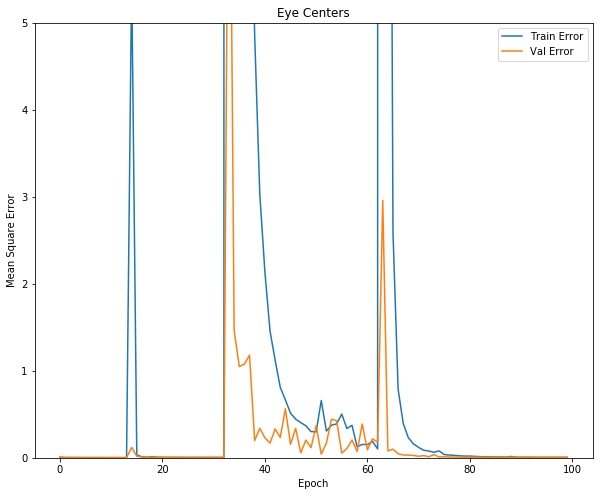

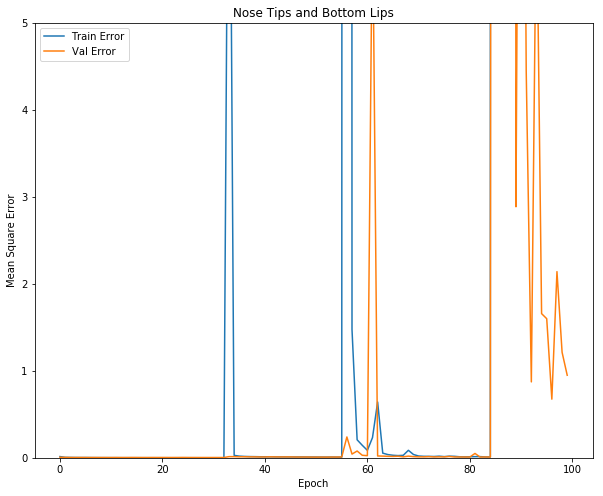

In [14]:
plot_history(history_eye_center_model,plot_title='Eye Centers',ylimit=5)
plot_history(history_nose_tip_bottom_lipmodel,plot_title='Nose Tips and Bottom Lips',ylimit=5)
#save the model 

Eye_Center_model1.save('Eye_Center_model1.hd5')
Nose_Lip_features_model1.save('Nose_Lip_features_model1.hd5')

We see from above that the losses are not stabilizing and not reaching the optimum minima.  
We will increase the batch size to 128 instead of 32 and check.  


In [10]:
#Create eye Center models 
Eye_Center_model2 = keras.Sequential()
Eye_Center_model2.add(layers.Conv2D(32, kernel_size=(5, 5),data_format='channels_last',
                     activation='linear',
                     input_shape=(56,96,1)))
Eye_Center_model2.add(LeakyReLU(alpha=0.1))
Eye_Center_model2.add(layers.Conv2D(64, (3, 3), activation='linear'))
Eye_Center_model2.add(LeakyReLU(alpha=0.1))
Eye_Center_model2.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Eye_Center_model2.add(layers.Conv2D(64, (3, 3), activation='linear'))
Eye_Center_model2.add(LeakyReLU(alpha=0.1))
Eye_Center_model2.add(layers.Conv2D(64, (3, 3), activation='linear'))
Eye_Center_model2.add(LeakyReLU(alpha=0.1))
Eye_Center_model2.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Eye_Center_model2.add(layers.Conv2D(128, (2, 2), activation='linear'))
Eye_Center_model2.add(LeakyReLU(alpha=0.1))
Eye_Center_model2.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Eye_Center_model2.add(layers.Flatten())
Eye_Center_model2.add(layers.Dense(500, activation='linear'))
Eye_Center_model2.add(LeakyReLU(alpha=0.1))
Eye_Center_model2.add(layers.Dropout(rate=0.25))
Eye_Center_model2.add(layers.Dense(500,activation='linear'))
Eye_Center_model2.add(LeakyReLU(alpha=0.1))
Eye_Center_model2.add(layers.Dense(4))
optimizer = tf.keras.optimizers.Adam()
Eye_Center_model2.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])
print("+++++++++++++++++++EYE CENTERS MODEL +++++++++++++++++++++++++++")
Eye_Center_model2.summary()
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")

#Create Nose and bottom lip feature models 
Nose_Lip_features_model2 = keras.Sequential()
Nose_Lip_features_model2.add(layers.Conv2D(32, kernel_size=(5, 5),data_format='channels_last',
                     activation='linear',
                     input_shape=(56,96,1)))
Nose_Lip_features_model2.add(LeakyReLU(alpha=0.1))
Nose_Lip_features_model2.add(layers.Conv2D(64, (3, 3), activation='linear'))
Nose_Lip_features_model2.add(LeakyReLU(alpha=0.1))
Nose_Lip_features_model2.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Nose_Lip_features_model2.add(layers.Conv2D(64, (3, 3), activation='linear'))
Nose_Lip_features_model2.add(LeakyReLU(alpha=0.1))
Nose_Lip_features_model2.add(layers.Conv2D(64, (3, 3), activation='linear'))
Nose_Lip_features_model2.add(LeakyReLU(alpha=0.1))
Nose_Lip_features_model2.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Nose_Lip_features_model2.add(layers.Conv2D(128, (2, 2), activation='linear'))
Nose_Lip_features_model2.add(LeakyReLU(alpha=0.1))
Nose_Lip_features_model2.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2)))
Nose_Lip_features_model2.add(layers.Flatten())
Nose_Lip_features_model2.add(layers.Dense(500, activation='linear'))
Nose_Lip_features_model2.add(LeakyReLU(alpha=0.1))
Nose_Lip_features_model2.add(layers.Dropout(rate=0.25))
Nose_Lip_features_model2.add(layers.Dense(500,activation='linear'))
Nose_Lip_features_model2.add(LeakyReLU(alpha=0.1))
Nose_Lip_features_model2.add(layers.Dense(4))
optimizer = tf.keras.optimizers.Adam()
Nose_Lip_features_model2.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])
print("+++++++++++++++++++NOSE BOTTOM LIP MODEL ++++++++++++++++++++++++++++++")
Nose_Lip_features_model2.summary()
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
+++++++++++++++++++EYE CENTERS MODEL +++++++++++++++++++++++++++
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 52, 92, 32)        832       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 52, 92, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 90, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 50, 90, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 

In [11]:
# Now let us train the models this with epochs as 50
EPOCHS =50
print("Training Eye Center Model")
print("+++++++++++++++++++++++++++++++++++")
history_eye_center_model2 = Eye_Center_model2.fit(X_train_Eye_Center_NN,Y_train_Eye_centers,
                                                 epochs=EPOCHS, validation_split = 0.2, verbose=2,
                                                 batch_size = 128)
print("+++++++++++++++++++++++++++++++++++\n")

print("Training Nose Tip Bottom lip Model")
history_nose_tip_bottom_lipmodel2 = Nose_Lip_features_model2.fit(X_train_Nose_tips_bottom_lips_NN,
                                                                Y_train_nose_tips_bottom_lips,
                                                epochs=EPOCHS, validation_split = 0.2, verbose=2,
                                                batch_size = 128)
print("+++++++++++++++++++++++++++++++++++\n")

Training Eye Center Model
+++++++++++++++++++++++++++++++++++
Train on 10568 samples, validate on 2642 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 245s - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 2/50
 - 267s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 3/50
 - 267s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 4/50
 - 263s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 5/50
 - 263s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 6/50
 - 264s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 7/50
 - 262s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 8/50
 - 265s - loss: 0.0021 - 

Epoch 16/50
 - 266s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 17/50
 - 263s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 18/50
 - 264s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 19/50
 - 265s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 20/50
 - 262s - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 21/50
 - 263s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 22/50
 - 264s - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 23/50
 - 262s - loss: 9.6184e-04 - mean_squared_error: 9.6184e-04 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 24/50
 - 266s - loss: 0.0010 - mean_squared_error: 0.0010 

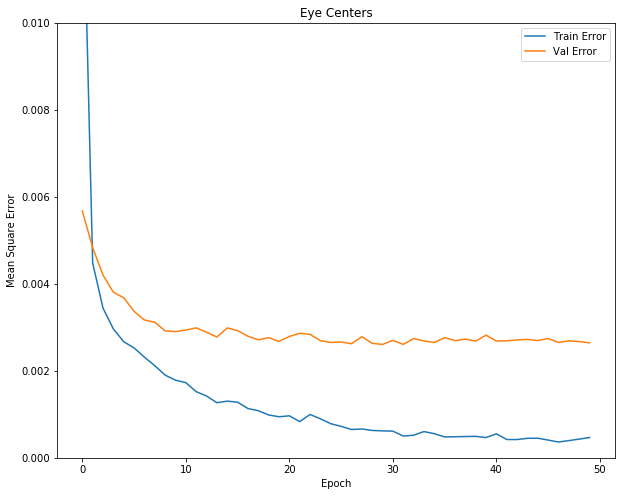

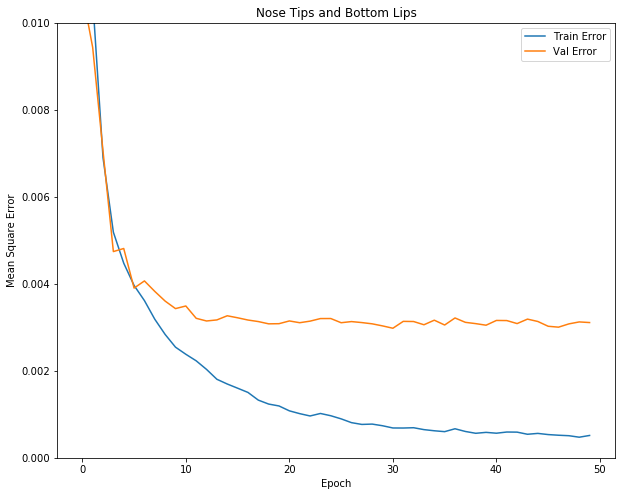

In [14]:
plot_history(history_eye_center_model2,plot_title='Eye Centers')
plot_history(history_nose_tip_bottom_lipmodel2,plot_title='Nose Tips and Bottom Lips')
#save the model 

Eye_Center_model2.save('Eye_Center_model2.hd5')
Nose_Lip_features_model2.save('Nose_Lip_features_model2.hd5')

In [15]:
Eye_features_model1 = keras.models.load_model('Eye_features_model1.hd5')
Mouth_features_model1 = keras.models.load_model('Mouth_features_model1.hd5')

 CNN RMSE = 0.039846 
We have normalized the predicted value between -1,1 so original CNN RMSE is 48 X RMSE = 1.912592
CNN RMSE for each Feature:


,CNN RMSE
left_eye_center,1.221928
right_eye_center,1.288254
left_eye_inner_corner,1.266469
left_eye_outer_corner,1.498243
right_eye_inner_corner,1.338274
right_eye_outer_corner,1.629537
left_eyebrow_inner_end,1.873932
left_eyebrow_outer_end,2.346055
right_eyebrow_inner_end,1.934533
right_eyebrow_outer_end,2.452239


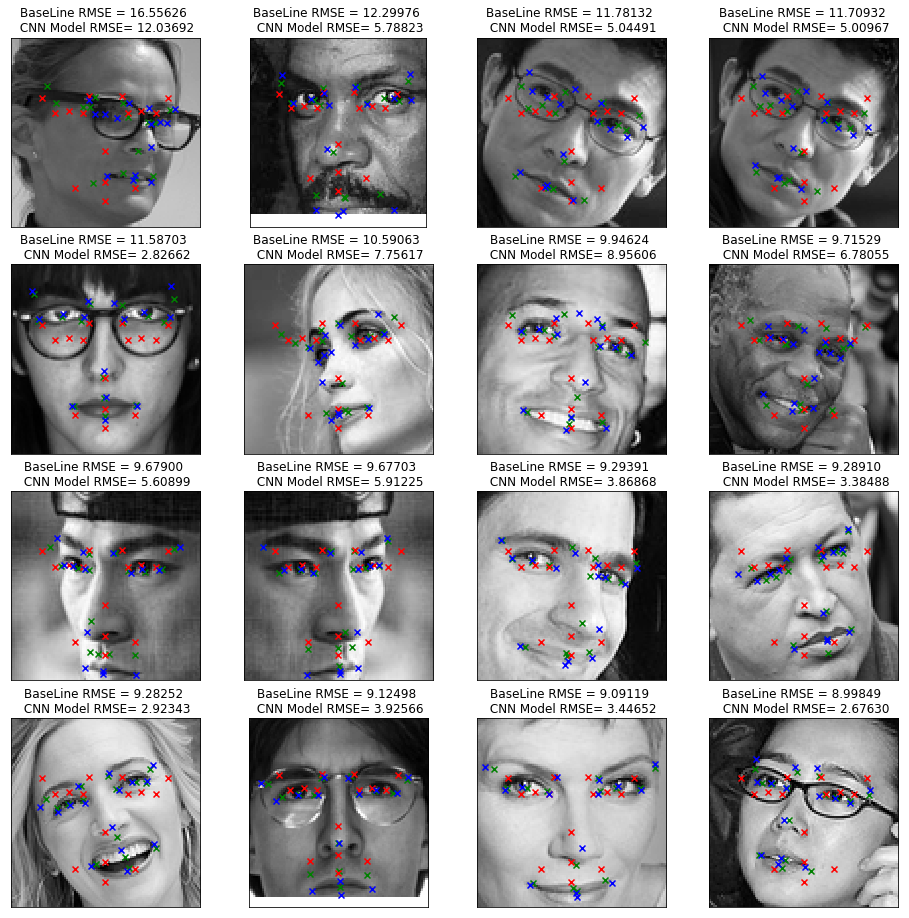

In [18]:
y_pred_eye_centers = Eye_Center_model2.predict(X_dev_eye_features_NN)
y_pred_nose_lips_features = Nose_Lip_features_model2.predict(X_dev_mouth_features_NN)
y_pred_eye_features = Eye_features_model1.predict(X_dev_eye_features_NN)
y_pred_mouth_features = Mouth_features_model1.predict(X_dev_mouth_features_NN)
#eye_center_y_index = [0,1,2,3]
#eye_corners_eye_brows_y_index = [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
#nose_tips_y_index = [20,21]
#mouth_corner_top_lips_y_index = [22,23,24,25,26,27]
#nose_tip_mouth_bottom_y_index = [20,21,28,29]
y_pred_nn1 = y_pred_eye_centers
y_pred_nn1 = np.hstack((y_pred_nn1,y_pred_eye_features[:,range(4,20)]))
y_pred_nn1 = np.hstack((y_pred_nn1,y_pred_nose_lips_features[:,[0,1]]))
y_pred_nn1 = np.hstack((y_pred_nn1,y_pred_mouth_features[:,range(2,8)]))
y_pred_nn1 = np.hstack((y_pred_nn1,y_pred_nose_lips_features[:,[2,3]]))
#y_pred_nn1 = model9.predict(X_dev_NN)
nn1_RMSE,nn1_RMSE_unscaled,nn1_RMSE_eachexample,nn1_RMSE_eachexample_unscaled,\
nn1_RMSE_each_feature,nn1_RMSE_each_feature_unscaled = compute_rmse(Y_dev,y_pred_nn1)

print(" CNN RMSE = %.6f "%(nn1_RMSE))

print("We have normalized the predicted value between -1,1 so original CNN RMSE is 48 X RMSE = %.6f"\
      %(nn1_RMSE_unscaled))

nn1_RMSE_each_feature_unscaled_df = pd.DataFrame(data=nn1_RMSE_each_feature_unscaled,
                                                       columns=['CNN RMSE'],
                                                       index=feature_names)
print("CNN RMSE for each Feature:")
display(nn1_RMSE_each_feature_unscaled_df)
fig = plt.figure(figsize=(16, 16))
count = 1
for i in np.argsort(base_line_RMSE_eachexample,axis=0)[-16:][::-1] :
    
    ax = fig.add_subplot(4, 4, count, xticks=[], yticks=[])
    ax.imshow((X_dev[i]).reshape(96,96),cmap='gray')
    ax.scatter(y_pred_nn1[i,0::2]*48+48, 
               y_pred_nn1[i,1::2]*48+48,marker='x',color='green')
    ax.scatter(Y_baseLine_predictions[0,0::2]*48+48, 
               Y_baseLine_predictions[0,1::2]*48+48,marker='x',color='red')
    ax.scatter(Y_dev[i,0::2]*48+48, 
               Y_dev[i,1::2]*48+48,marker='x',color='blue')
    ax.set_title("BaseLine RMSE = %.5f \n CNN Model RMSE= %.5f"\
                 %(base_line_RMSE_eachexample_unscaled[i],nn1_RMSE_eachexample_unscaled[i]))
    count +=1
plt.show()
